# Mentoria: "Detección de Objetos en Imágenes" de la Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus aplicaciones - Año: 2020.

## Grupo 2: 
 * Maria Florencia Caballero
 * Joel Vivas
 * Leonardo Rodriguez
 * Diego Gonzalez 

Mentora: Lucía Benitez.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Mentoria')

In [ ]:
data_sets_path = "/content/drive/My Drive/Mentoria/muestra"
os.chdir('{}'.format(data_sets_path))

In [ ]:
def load_or_fit(model_file, mk_model, X, y):
  try:
    model = load(model_file)
    print("SKIPPED training, Model LOADED from file %s" % model_file)
    return model
  except FileNotFoundError:
    print("Building model...")
    model = mk_model()
    print("Training model...")
    model.fit(X, y)
    print("Saving model")
    dump(model, model_file)
    print("Done")
    return model

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import plot_tree
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron

from sklearn.metrics import classification_report
from joblib import dump, load

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

## Dataset

En esta sección vamos a preparar el conjuto de datos para aplicar los algoritmos. 

In [ ]:
data_full = pd.read_csv("csv_wlabels_muestra_df_original.csv", index_col=0)

In [ ]:
data_full

,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,218,461,464,715,M,G,train,243,251,60993,si,Amarillo,0.740974,1.066019,0.132695,0.224892,0.140456,0.129134,0.201447,1.076733,0.461108,0.299800,0.457940,0.201904,0.569677,0.737381,0.480929,0.200076,0.018410,0.674050,0.028826,0.005310,0.128693,0.592353,0.138541,0.141684,0.363294,0.264674,0.519292,...,0.463567,0.091676,0.300955,0.696112,2.409413,0.536980,0.102273,0.157441,0.165093,1.067619,0.751934,0.231443,0.487437,0.446320,0.822407,0.527523,0.217110,0.489194,1.535306,0.521390,0.599480,0.201182,0.391337,0.040206,1.347440,0.448389,0.462778,0.590751,0.877142,0.009986,0.939221,0.859877,0.981910,0.356366,1.748501,0.288037,0.079172,0.266234,0.078312,0.421612
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,617,865,432,598,M,G,train,248,166,41168,si,Amarillo,1.621832,0.208859,0.627041,0.061717,0.052486,0.064176,0.479256,1.068516,0.509059,0.207385,0.218195,0.169190,0.695486,0.237641,0.146711,0.126334,0.029900,0.148363,0.126833,0.181351,0.044585,0.447270,0.134360,0.113650,1.153900,0.653832,0.041024,...,0.816892,0.027489,0.183116,0.626535,1.734605,0.672962,0.030057,0.101685,0.295544,0.392251,0.874054,0.105285,0.110713,0.421417,1.335695,0.500971,1.139208,0.110803,0.850265,0.618181,0.077352,0.376629,0.319234,0.783792,0.427963,0.133063,0.064981,0.017857,0.320706,0.219192,1.199712,0.808466,0.491182,0.356616,0.812572,0.481357,0.071471,0.572322,0.052072,0.213453
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,875,1169,321,450,M,G,train,294,129,37926,si,Amarillo,0.777015,0.350298,0.523675,0.141681,0.008227,0.364888,0.559975,1.060057,0.648008,0.075809,0.419526,0.200864,0.553840,0.182195,0.244877,0.038389,0.046786,0.020999,0.281995,0.016088,0.135179,0.635030,0.276898,0.014077,0.613297,0.622520,0.117482,...,0.250315,0.025067,0.150927,0.604435,1.067641,0.847809,0.220889,0.298962,0.535717,0.566534,0.531686,0.208911,0.254966,0.229268,1.809620,0.362365,0.468568,0.055350,1.388036,0.884211,0.340101,0.305252,0.343156,1.061346,1.043128,0.004126,0.033861,0.020319,0.621639,0.040598,0.916142,0.246840,0.688755,0.101427,0.917090,0.407893,0.343683,0.428996,0.080831,0.005678
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,502,758,145,307,M,G,train,256,162,41472,si,Amarillo,0.206803,0.032262,0.783582,0.104788,0.198923,0.229943,0.102975,1.872409,0.646370,0.369061,0.323460,0.136720,0.515654,0.139382,0.084579,0.205710,0.007865,0.329643,0.279838,0.096330,0.003207,0.161915,0.546153,0.034820,0.178539,0.245108,0.190008,...,0.146642,0.114052,0.005513,0.370992,0.665213,1.402337,0.162487,0.155748,0.241372,0.702011,0.993891,0.174953,0.551115,0.294757,0.660277,0.545881,0.343379,0.348534,0.342936,0.632171,0.079185,0.238604,0.062875,0.798502,1.009929,0.130553,0.003187,0.115578,0.427998,0.110039,0.992854,0.904692,0.112806,0.488674,1.150740,0.275088,0.254404,0.455159,0.012721,0.091329
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,916,1151,285,463,M,G,train,235,178,41830,si,Amarillo,0.683246,0.319097,0.322898,0.489538,0.152056,0.593756,0.177822,1.093265,0.949665,0.154196,0.645907,0.270926,0.383814,0.204949,0.398145,0.102344,0.060811,0.121956,0.028302,0.120451,0.244606,0.387735,0.251303,0.236359,0.880333,0.466272,0.185311,...,0.652505,0.140662,0.354066,0.571745,2.067905,1.038591,0.099552,0.280820,0.516782,0.820352,0.601326,0.042655,0.119472,0.094523,2.042640,0.790532,0.266744,0.056142,0.620942,0.859705,0.439731,0.290626,0.310608,0.721135,0.988298,0.026431,0.317181,0.199194,0.524838,0.139992,1.304742,0.415517,0.652986,0.141079,1.024287,0.117491,0.007151,0.294575,0.217550,0.240535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Escalamos las carácteristicas númericas entre 0 y 1:

In [ ]:
numeric_features = data_full.columns[13:]
num_data = data_full[numeric_features]
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(num_data) 
data_full.loc[:,numeric_features] = scaled_values
data_full

,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,218,461,464,715,M,G,train,243,251,60993,si,Amarillo,0.263830,0.704792,0.034122,0.137222,0.092648,0.065374,0.104694,0.384243,0.202912,0.239793,0.278699,0.095227,0.152010,0.429039,0.376782,0.296330,0.005860,0.364397,0.011918,0.002358,0.048126,0.256728,0.047876,0.082648,0.174145,0.172094,0.312131,...,0.253805,0.094181,0.610268,0.289414,0.691514,0.128421,0.050855,0.073419,0.094483,0.486347,0.382585,0.165786,0.401814,0.616576,0.201839,0.229259,0.080744,0.348295,0.439004,0.213163,0.480562,0.119316,0.211313,0.013364,0.469873,0.341217,0.161916,0.372641,0.657320,0.010271,0.422114,0.286100,0.448205,0.184068,0.569234,0.180088,0.032812,0.200256,0.027650,0.274581
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,617,865,432,598,M,G,train,248,166,41168,si,Amarillo,0.577466,0.138086,0.162486,0.037658,0.034621,0.032489,0.249118,0.381289,0.224014,0.165875,0.132792,0.079798,0.185580,0.138269,0.114940,0.187111,0.009517,0.079396,0.054660,0.080521,0.016673,0.193849,0.046431,0.066295,0.553121,0.425129,0.024658,...,0.447252,0.028240,0.371318,0.260486,0.497825,0.163913,0.014945,0.047418,0.169140,0.177929,0.444720,0.075417,0.091265,0.582172,0.327813,0.217719,0.423674,0.078889,0.242875,0.252735,0.062008,0.223370,0.172380,0.260777,0.149237,0.101259,0.022735,0.011264,0.240314,0.225438,0.541079,0.268994,0.224206,0.184197,0.259797,0.300957,0.029621,0.430489,0.018386,0.139015
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,875,1169,321,450,M,G,train,294,129,37926,si,Amarillo,0.276662,0.231597,0.135645,0.086449,0.005426,0.184723,0.291081,0.378248,0.285158,0.060636,0.255320,0.094737,0.147784,0.106009,0.191848,0.056857,0.014892,0.010346,0.122329,0.007143,0.050551,0.275225,0.095689,0.008211,0.293983,0.404770,0.070615,...,0.137048,0.025752,0.306046,0.251298,0.306387,0.209548,0.109835,0.139413,0.306591,0.257518,0.270522,0.149646,0.210179,0.316726,0.444126,0.157482,0.174262,0.039408,0.396840,0.361498,0.272636,0.181038,0.185297,0.353128,0.363755,0.003140,0.011847,0.012817,0.465840,0.041755,0.411574,0.082129,0.314391,0.052388,0.294353,0.255025,0.142438,0.322682,0.028540,0.003698
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,502,758,145,307,M,G,train,256,162,41472,si,Amarillo,0.073634,0.021330,0.203134,0.063939,0.131214,0.116408,0.053503,0.670293,0.284438,0.295191,0.196855,0.064484,0.137595,0.081098,0.066263,0.304674,0.002503,0.177677,0.121388,0.042771,0.001199,0.070175,0.188737,0.020311,0.085582,0.159373,0.114208,...,0.080287,0.117168,0.011180,0.154243,0.190879,0.354282,0.080796,0.072629,0.138138,0.319386,0.505693,0.125322,0.454307,0.407196,0.162049,0.237237,0.127703,0.248148,0.097626,0.258455,0.063477,0.141511,0.033951,0.265672,0.352178,0.099349,0.001115,0.072906,0.320721,0.113174,0.446608,0.301011,0.051491,0.252406,0.371602,0.171992,0.105437,0.342362,0.004491,0.059480
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,916,1151,285,463,M,G,train,235,178,41830,si,Amarillo,0.243275,0.210969,0.083511,0.298701,0.100299,0.300588,0.092413,0.390186,0.417904,0.123333,0.393094,0.127781,0.102415,0.119248,0.311925,0.151580,0.019356,0.065079,0.011690,0.053481,0.091472,0.168046,0.086844,0.137874,0.421987,0.303176,0.111385,...,0.357250,0.144506,0.717966,0.237707,0.593491,0.259343,0.049501,0.130953,0.295755,0.373428,0.305955,0.030554,0.098486,0.130581,0.501315,0.343561,0.099203,0.039972,0.177219,0.351479,0.352502,0.172364,0.167722,0.239929,0.344635,0.020114,0.110975,0.125650,0.393295,0.143981,0.589046,0.138252,0.298064,0.072869,0.329794,0.073458,0.002964,0.221573,0.076812,0.156652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Eliminamos las columnas que no usaremos en este práctico.

In [ ]:
data_full = data_full.drop(["Type", "xmin", "xmax", "ymin", "ymax", "Time", "Hand_Pixel_Width", "Hand_Pixel_Height", "Area"], axis=1)

In [ ]:
data_full

,filename,Size,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,G,si,Amarillo,0.263830,0.704792,0.034122,0.137222,0.092648,0.065374,0.104694,0.384243,0.202912,0.239793,0.278699,0.095227,0.152010,0.429039,0.376782,0.296330,0.005860,0.364397,0.011918,0.002358,0.048126,0.256728,0.047876,0.082648,0.174145,0.172094,0.312131,0.110453,0.085366,0.184912,0.215543,0.189508,0.454694,0.279099,0.170354,0.046166,...,0.253805,0.094181,0.610268,0.289414,0.691514,0.128421,0.050855,0.073419,0.094483,0.486347,0.382585,0.165786,0.401814,0.616576,0.201839,0.229259,0.080744,0.348295,0.439004,0.213163,0.480562,0.119316,0.211313,0.013364,0.469873,0.341217,0.161916,0.372641,0.657320,0.010271,0.422114,0.286100,0.448205,0.184068,0.569234,0.180088,0.032812,0.200256,0.027650,0.274581
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,G,si,Amarillo,0.577466,0.138086,0.162486,0.037658,0.034621,0.032489,0.249118,0.381289,0.224014,0.165875,0.132792,0.079798,0.185580,0.138269,0.114940,0.187111,0.009517,0.079396,0.054660,0.080521,0.016673,0.193849,0.046431,0.066295,0.553121,0.425129,0.024658,0.204971,0.289099,0.383262,0.162053,0.189248,0.209075,0.081778,0.434649,0.437634,...,0.447252,0.028240,0.371318,0.260486,0.497825,0.163913,0.014945,0.047418,0.169140,0.177929,0.444720,0.075417,0.091265,0.582172,0.327813,0.217719,0.423674,0.078889,0.242875,0.252735,0.062008,0.223370,0.172380,0.260777,0.149237,0.101259,0.022735,0.011264,0.240314,0.225438,0.541079,0.268994,0.224206,0.184197,0.259797,0.300957,0.029621,0.430489,0.018386,0.139015
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,G,si,Amarillo,0.276662,0.231597,0.135645,0.086449,0.005426,0.184723,0.291081,0.378248,0.285158,0.060636,0.255320,0.094737,0.147784,0.106009,0.191848,0.056857,0.014892,0.010346,0.122329,0.007143,0.050551,0.275225,0.095689,0.008211,0.293983,0.404770,0.070615,0.369993,0.325447,0.307279,0.150901,0.192076,0.307519,0.196231,0.174007,0.077578,...,0.137048,0.025752,0.306046,0.251298,0.306387,0.209548,0.109835,0.139413,0.306591,0.257518,0.270522,0.149646,0.210179,0.316726,0.444126,0.157482,0.174262,0.039408,0.396840,0.361498,0.272636,0.181038,0.185297,0.353128,0.363755,0.003140,0.011847,0.012817,0.465840,0.041755,0.411574,0.082129,0.314391,0.052388,0.294353,0.255025,0.142438,0.322682,0.028540,0.003698
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,G,si,Amarillo,0.073634,0.021330,0.203134,0.063939,0.131214,0.116408,0.053503,0.670293,0.284438,0.295191,0.196855,0.064484,0.137595,0.081098,0.066263,0.304674,0.002503,0.177677,0.121388,0.042771,0.001199,0.070175,0.188737,0.020311,0.085582,0.159373,0.114208,0.629130,0.062459,0.021595,0.038986,0.065953,0.229845,0.111432,0.227034,0.008975,...,0.080287,0.117168,0.011180,0.154243,0.190879,0.354282,0.080796,0.072629,0.138138,0.319386,0.505693,0.125322,0.454307,0.407196,0.162049,0.237237,0.127703,0.248148,0.097626,0.258455,0.063477,0.141511,0.033951,0.265672,0.352178,0.099349,0.001115,0.072906,0.320721,0.113174,0.446608,0.301011,0.051491,0.252406,0.371602,0.171992,0.105437,0.342362,0.004491,0.059480
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,G,si,Amarillo,0.243275,0.210969,0.083511,0.298701,0.100299,0.300588,0.092413,0.390186,0.417904,0.123333,0.393094,0.127781,0.102415,0.119248,0.311925,0.151580,0.019356,0.065079,0.011690,0.053481,0.091472,0.168046,0.086844,0.137874,0.421987,0.303176,0.111385,0.271150,0.222979,0.180615,0.088779,0.096585,0.105628,0.161995,0.389995,0.125702,...,0.357250,0.144506,0.717966,0.237707,0.593491,0.259343,0.049501,0.130953,0.295755,0.373428,0.305955,0.030554,0.098486,0.130581,0.501315,0.343561,0.099203,0.039972,0.177219,0.351479,0.352502,0.172364,0.167722,0.239929,0.344635,0.020114,0.110975,0.125650,0.393295,0.143981,0.589046,0.138252,0.298

Codificamos las estiquetas de las variables guantes y color con números para poder ser usada por los algoritmos de aprendizaje

---

In [ ]:
le = LabelEncoder()
le.fit(data_full["guantes"])
data_full.loc[:, "guantes"] = le.transform(data_full["guantes"])

In [ ]:
le = LabelEncoder()
le.fit(data_full["color"])
data_full.loc[:, "color"] = le.transform(data_full["color"])
le.classes_

array(['Amarillo', 'Verde', 'mano'], dtype=object)

In [ ]:
data_full

,filename,Size,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,G,1,0,0.263830,0.704792,0.034122,0.137222,0.092648,0.065374,0.104694,0.384243,0.202912,0.239793,0.278699,0.095227,0.152010,0.429039,0.376782,0.296330,0.005860,0.364397,0.011918,0.002358,0.048126,0.256728,0.047876,0.082648,0.174145,0.172094,0.312131,0.110453,0.085366,0.184912,0.215543,0.189508,0.454694,0.279099,0.170354,0.046166,...,0.253805,0.094181,0.610268,0.289414,0.691514,0.128421,0.050855,0.073419,0.094483,0.486347,0.382585,0.165786,0.401814,0.616576,0.201839,0.229259,0.080744,0.348295,0.439004,0.213163,0.480562,0.119316,0.211313,0.013364,0.469873,0.341217,0.161916,0.372641,0.657320,0.010271,0.422114,0.286100,0.448205,0.184068,0.569234,0.180088,0.032812,0.200256,0.027650,0.274581
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,G,1,0,0.577466,0.138086,0.162486,0.037658,0.034621,0.032489,0.249118,0.381289,0.224014,0.165875,0.132792,0.079798,0.185580,0.138269,0.114940,0.187111,0.009517,0.079396,0.054660,0.080521,0.016673,0.193849,0.046431,0.066295,0.553121,0.425129,0.024658,0.204971,0.289099,0.383262,0.162053,0.189248,0.209075,0.081778,0.434649,0.437634,...,0.447252,0.028240,0.371318,0.260486,0.497825,0.163913,0.014945,0.047418,0.169140,0.177929,0.444720,0.075417,0.091265,0.582172,0.327813,0.217719,0.423674,0.078889,0.242875,0.252735,0.062008,0.223370,0.172380,0.260777,0.149237,0.101259,0.022735,0.011264,0.240314,0.225438,0.541079,0.268994,0.224206,0.184197,0.259797,0.300957,0.029621,0.430489,0.018386,0.139015
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,G,1,0,0.276662,0.231597,0.135645,0.086449,0.005426,0.184723,0.291081,0.378248,0.285158,0.060636,0.255320,0.094737,0.147784,0.106009,0.191848,0.056857,0.014892,0.010346,0.122329,0.007143,0.050551,0.275225,0.095689,0.008211,0.293983,0.404770,0.070615,0.369993,0.325447,0.307279,0.150901,0.192076,0.307519,0.196231,0.174007,0.077578,...,0.137048,0.025752,0.306046,0.251298,0.306387,0.209548,0.109835,0.139413,0.306591,0.257518,0.270522,0.149646,0.210179,0.316726,0.444126,0.157482,0.174262,0.039408,0.396840,0.361498,0.272636,0.181038,0.185297,0.353128,0.363755,0.003140,0.011847,0.012817,0.465840,0.041755,0.411574,0.082129,0.314391,0.052388,0.294353,0.255025,0.142438,0.322682,0.028540,0.003698
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,G,1,0,0.073634,0.021330,0.203134,0.063939,0.131214,0.116408,0.053503,0.670293,0.284438,0.295191,0.196855,0.064484,0.137595,0.081098,0.066263,0.304674,0.002503,0.177677,0.121388,0.042771,0.001199,0.070175,0.188737,0.020311,0.085582,0.159373,0.114208,0.629130,0.062459,0.021595,0.038986,0.065953,0.229845,0.111432,0.227034,0.008975,...,0.080287,0.117168,0.011180,0.154243,0.190879,0.354282,0.080796,0.072629,0.138138,0.319386,0.505693,0.125322,0.454307,0.407196,0.162049,0.237237,0.127703,0.248148,0.097626,0.258455,0.063477,0.141511,0.033951,0.265672,0.352178,0.099349,0.001115,0.072906,0.320721,0.113174,0.446608,0.301011,0.051491,0.252406,0.371602,0.171992,0.105437,0.342362,0.004491,0.059480
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,G,1,0,0.243275,0.210969,0.083511,0.298701,0.100299,0.300588,0.092413,0.390186,0.417904,0.123333,0.393094,0.127781,0.102415,0.119248,0.311925,0.151580,0.019356,0.065079,0.011690,0.053481,0.091472,0.168046,0.086844,0.137874,0.421987,0.303176,0.111385,0.271150,0.222979,0.180615,0.088779,0.096585,0.105628,0.161995,0.389995,0.125702,...,0.357250,0.144506,0.717966,0.237707,0.593491,0.259343,0.049501,0.130953,0.295755,0.373428,0.305955,0.030554,0.098486,0.130581,0.501315,0.343561,0.099203,0.039972,0.177219,0.351479,0.352502,0.172364,0.167722,0.239929,0.344635,0.020114,0.110975,0.125650,0.393295,0.143981,0.589046,0.138252,0.298064,0.072869,0.329794,0.073458,0.002964,

Separamos el dataset por el tamaño del objeto: "G" y "P"

---



In [ ]:
data_big = data_full[data_full.Size == "G"]
data_small = data_full[data_full.Size == "P"]

Generamos las variables "X" e "Y" para cada dataset. Haremos clasificación binaria (guantes) y multiclase (color).

In [ ]:
X_big = data_big[numeric_features]
Y_big_target1 = data_big["color"]
Y_big_target2 = data_big["guantes"]
X_small = data_small[numeric_features]
Y_small_target1 = data_small["color"]
Y_small_target2 = data_small["guantes"]

Separamos los conjutos de datos en "train" y "test" para cada dataset:

In [ ]:
X_big_train, X_big_test, y_big_target1_train, y_big_target1_test = train_test_split(X_big, Y_big_target1, train_size=0.7, random_state=42)
X_big_train, X_big_test, y_big_target2_train, y_big_target2_test = train_test_split(X_big, Y_big_target2, train_size=0.7, random_state=42)
X_small_train, X_small_test, y_small_target1_train, y_small_target1_test = train_test_split(X_small, Y_small_target1, train_size=0.7, random_state=42)
X_small_train, X_small_test, y_small_target2_train, y_small_target2_test = train_test_split(X_small, Y_small_target2, train_size=0.7, random_state=42)

Crearemos un diccionario de modelos para poder compararlos entre todos en la última sección. Además se realiza un modelo VotingClassifier para intentar
mejorar la presición. La clave del diccionario es el nombre del archivo en el
cuál se guarda el mismo.

In [ ]:
models_info = {}

# **Entrenamiento de algoritmos para generar un modelo:**


Para cada algoritmo hay 8 reportes, 4 para el modelo de parámetros por defecto, y 4 para el modelo de parámetros con cross-validation. Los 4 reportes corresponden a las imagenes grandes clasificación binaria y multiclase, y las imagenes chicas clasificación binaria y multiclase. 

Se informan las métricas de clasificación respecto al dataset de entramiento y respecto al dataset de test. Se grafica además la matriz de confusión y la curva ROC (esta última sólo para la clasificación binaria).

Definición de las funciones comunes:


In [ ]:
def predict_and_show_results(model, X_test, y_test):
    y_test_pred = model.predict(X_test)
    print("\n\nDesempeño en el dataSet de TEST")
    print(classification_report(y_test, y_test_pred))
    report = classification_report(y_test, y_test_pred, output_dict=True)
    confusion_plot(y_test, y_test_pred)
    values = y_test.unique()
    if len(values) == 2: # roc curve only for binary classification.
      print("Curva ROC (clasificación binaria)")
      roc_plot(y_test, y_test_pred)
    est = model
    if isinstance(model, GridSearchCV):
      est = model.best_estimator_
    if isinstance(est, DecisionTreeClassifier):
      tree_plot(est)
    return report
       
def tree_plot(model):
  print("Gráfico del árbol de desición")
  plt.figure(figsize=(20, 20))
  plot_tree(model)
  plt.show()

def confusion_matrix_df(y_test, y_test_pred):
    matrix = confusion_matrix(y_test, y_test_pred)
    print("Valores de la Matriz de Confusión:")
    df_confusion = pd.DataFrame(matrix)
    print(df_confusion)
    return df_confusion

def confusion_plot(y_test, y_test_pred):
    df = confusion_matrix_df(y_test, y_test_pred)
    colormap = sns.color_palette("BrBG", 10)
    img = sns.heatmap(df, annot=True, cbar=None, cmap=colormap)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True Classes")
    plt.xlabel("Predicted Classes")
    plt.show()

def roc_plot(y_test, y_test_pred):
  print("ROC SCORE", roc_auc_score(y_test, y_test_pred))
  fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  ax2 = plt.gca().twinx()
  ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
  ax2.set_ylabel('Threshold',color='r')
  ax2.set_ylim([thresholds[-1],thresholds[0]])
  ax2.set_xlim([fpr[0],fpr[-1]])
  plt.show()

In [ ]:
def create_and_fit(filename, mk_model, X_train, y_train, X_test, y_test):
    model = load_or_fit(filename, mk_model, X_train, y_train)
    print(model)
    # if it is a gridsearch, print selected params
    if isinstance(model, GridSearchCV):
      print("Parámetros elegidos")
      print(model.best_params_)
    y_train_pred = model.predict(X_train)
    print("\n\nDesempeño en el dataSet de TRAIN")
    print(classification_report(y_train_pred, y_train))
    report = predict_and_show_results(model, X_test, y_test)
    models_info[filename] = {
        "model": model,
        "report": report
    }
    return model

def run(filename_prefix, mk_model):
    sep = 100
    ############### BIG (color, guantes)
    print(("#" * sep))
    filename1 = filename_prefix + "-big-color.g2.joblib"
    print("\n Modelo entrenado para objetos de tamaño grande con la variable COLOR como objetivo y guardando el modelo en el archivo: %s \n" % filename1)
    model_big_target1 = create_and_fit(filename1, mk_model, X_big_train, y_big_target1_train, X_big_test, y_big_target1_test)
    print("#" * sep)
    filename2 = filename_prefix + "-big-guantes.g2.joblib"
    print("\n Modelo entrenado para objetos de tamaño grande con la variable GUANTE como objetivo y guardando el modelo en el archivo: %s \n" % filename2)

    model_big_target2 = create_and_fit(filename2, mk_model, X_big_train, y_big_target2_train, X_big_test, y_big_target2_test)
    ############### SMALL (color, guantes)
    print("#" * sep) 
    filename3 = filename_prefix + "-small-color.g2.joblib"
    print("\n Modelo entrenado para objetos de tamaño pequeño con la variable COLOR como objetivo y guardando el modelo en el archivo: %s \n" % filename3)
    model_small_target1 = create_and_fit(filename3, mk_model, X_small_train, y_small_target1_train, X_small_test, y_small_target1_test)
    print("#" * sep)
    filename4 = filename_prefix + "-small-guantes.g2.joblib"
    print("\n Modelo entrenado para objetos de tamaño pequeño con la variable GUANTE como objetivo y guardando el modelo en el archivo: %s \n" % filename4)
    model_small_target2 = create_and_fit(filename4, mk_model, X_small_train, y_small_target2_train, X_small_test, y_small_target2_test)
    print("#" * sep)
    return (model_big_target1, model_big_target2, model_small_target1, model_small_target2)


## Perceptron

### Perceptron Default

Perceptron con los parámetros por defecto.

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable COLOR como objetivo y guardando el modelo en el archivo: perceptron-big-color.g2.joblib 

SKIPPED training, Model LOADED from file perceptron-big-color.g2.joblib
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00       172
           2       1.00      1.00      1.00       243

    accuracy                           1.00       610
   macro avg       1.00      1.00      1.00       610
weighted avg       1.00 

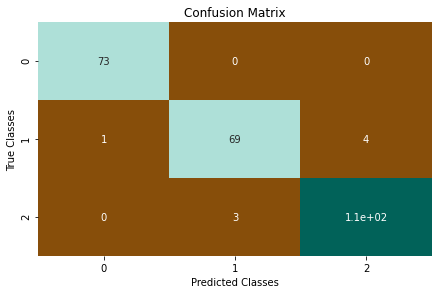

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable GUANTE como objetivo y guardando el modelo en el archivo: perceptron-big-guantes.g2.joblib 

SKIPPED training, Model LOADED from file perceptron-big-guantes.g2.joblib
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       367

    accuracy                           1.00       610
   macro avg       1.00      1.00      1.00       610
weighted avg       1.00      1.00      1.00       610



Desempeño en el 

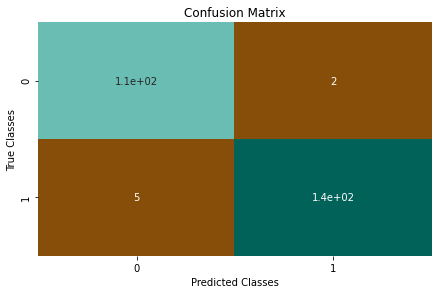

Curva ROC (clasificación binaria)
ROC SCORE 0.9742975451049986


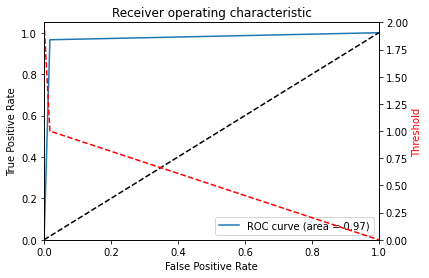

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable COLOR como objetivo y guardando el modelo en el archivo: perceptron-small-color.g2.joblib 

SKIPPED training, Model LOADED from file perceptron-small-color.g2.joblib
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       173
           2       1.00      1.00      1.00       214

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       

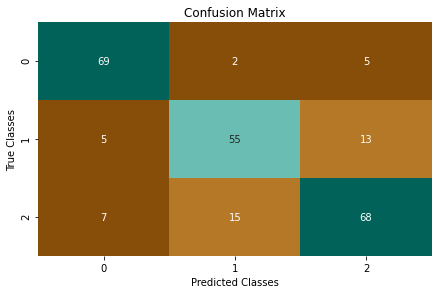

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable GUANTE como objetivo y guardando el modelo en el archivo: perceptron-small-guantes.g2.joblib 

SKIPPED training, Model LOADED from file perceptron-small-guantes.g2.joblib
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00       343

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       1.00      1.00      1.00       557



Desempeño e

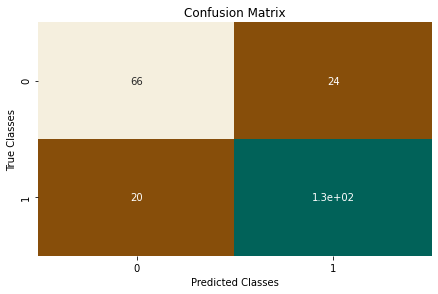

Curva ROC (clasificación binaria)
ROC SCORE 0.7995525727069352


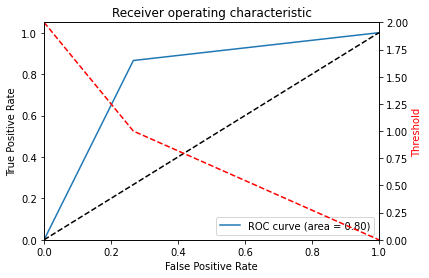

####################################################################################################


In [ ]:
(perc_big_1, perc_big_2, perc_small_1, perc_small_2) = run("perceptron", lambda: Perceptron(random_state=42))

### Perceptron CV

Aplicación del perceptron con diferentes estrategias de regularización: L1, L2 y Elasticnet

In [ ]:
per_grid = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "tol": [1e-3, 1e-5, 1e-7]
}
perc_gs = GridSearchCV(Perceptron(random_state=42), per_grid, verbose=1, cv=5, n_jobs=-1)

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable COLOR como objetivo y guardando el modelo en el archivo: perceptron-cv-big-color.g2.joblib 

SKIPPED training, Model LOADED from file perceptron-cv-big-color.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=42, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'tol': [0.0

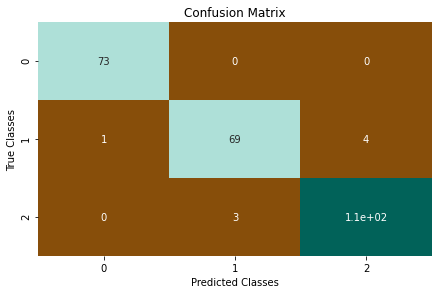

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable GUANTE como objetivo y guardando el modelo en el archivo: perceptron-cv-big-guantes.g2.joblib 

SKIPPED training, Model LOADED from file perceptron-cv-big-guantes.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=42, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'tol':

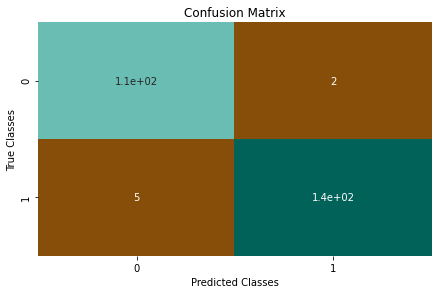

Curva ROC (clasificación binaria)
ROC SCORE 0.9742975451049986


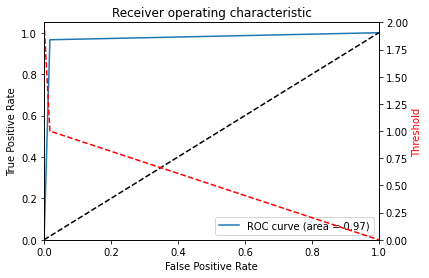

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable COLOR como objetivo y guardando el modelo en el archivo: perceptron-cv-small-color.g2.joblib 

SKIPPED training, Model LOADED from file perceptron-cv-small-color.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=42, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'tol':

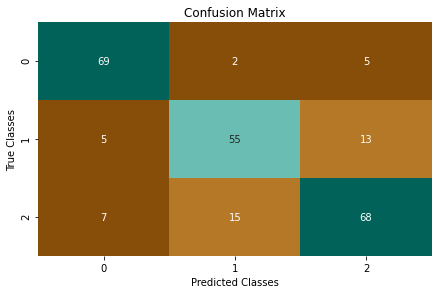

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable GUANTE como objetivo y guardando el modelo en el archivo: perceptron-cv-small-guantes.g2.joblib 

SKIPPED training, Model LOADED from file perceptron-cv-small-guantes.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=42, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         '

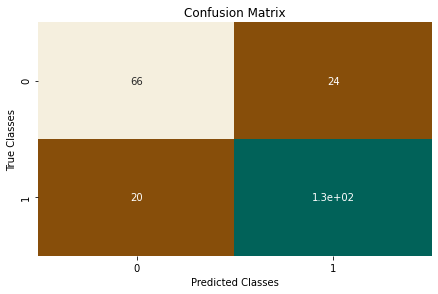

Curva ROC (clasificación binaria)
ROC SCORE 0.7995525727069352


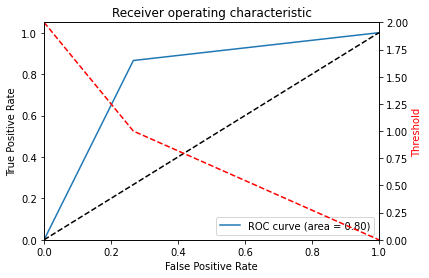

####################################################################################################


In [ ]:
(perc_cv_big_1, perc_cv_big_2, perc_cv_small_1, perc_cv_small_2) = run("perceptron-cv", lambda: perc_gs)

## SGD

Clasificación lineal con descenso de gradiente estocástico como regularización

### SGD Default

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable COLOR como objetivo y guardando el modelo en el archivo: sgd-big-color.g2.joblib 

SKIPPED training, Model LOADED from file sgd-big-color.g2.joblib
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00       172
           2       1.00      1.00      1.00       243

    accurac

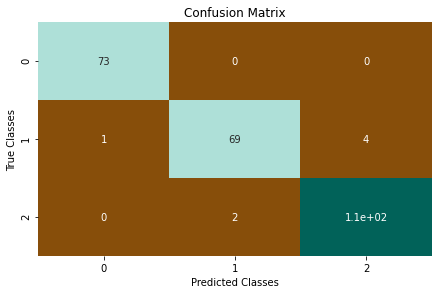

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable GUANTE como objetivo y guardando el modelo en el archivo: sgd-big-guantes.g2.joblib 

SKIPPED training, Model LOADED from file sgd-big-guantes.g2.joblib
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       367

    accuracy                           1.00       610
   mac

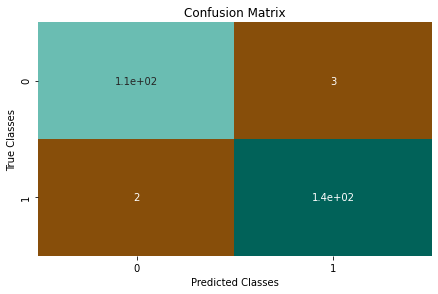

Curva ROC (clasificación binaria)
ROC SCORE 0.9801538006506951


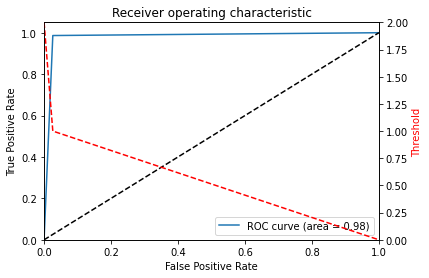

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable COLOR como objetivo y guardando el modelo en el archivo: sgd-small-color.g2.joblib 

SKIPPED training, Model LOADED from file sgd-small-color.g2.joblib
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       173
           2       1.00      1.00      1.00       214

    ac

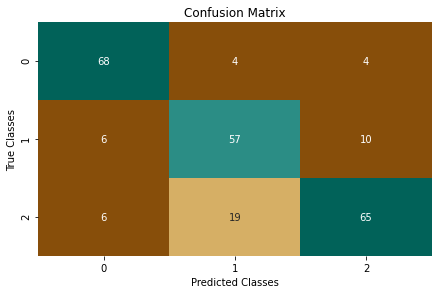

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable GUANTE como objetivo y guardando el modelo en el archivo: sgd-small-guantes.g2.joblib 

SKIPPED training, Model LOADED from file sgd-small-guantes.g2.joblib
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       189
           1       1.00      0.93      0.96       368

    accuracy                           0.96       557
 

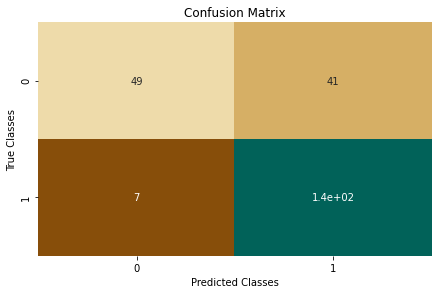

Curva ROC (clasificación binaria)
ROC SCORE 0.7487322893363162


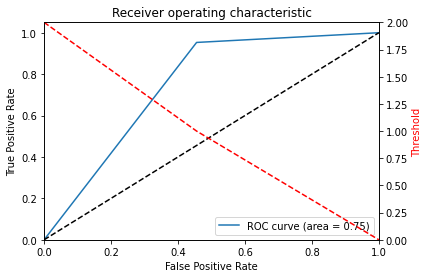

####################################################################################################


In [ ]:
(sgd_big_1, sgd_big_2, sgd_small_1, sgd_small_2) = run("sgd", lambda: SGDClassifier(random_state=42))


### SGD CV

In [ ]:
sgd_grid = {
    "loss": ["hinge", "log", "modified_huber", "squared_hinge"],
    "tol": [1e-3, 1e-5, 1e-7]
}
sgd_gs = GridSearchCV(SGDClassifier(random_state=42), sgd_grid, verbose=1, cv=5, n_jobs=-1)

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable COLOR como objetivo y guardando el modelo en el archivo: sgd-cv-big-color.g2.joblib 

SKIPPED training, Model LOADED from file sgd-cv-big-color.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=42,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, ve

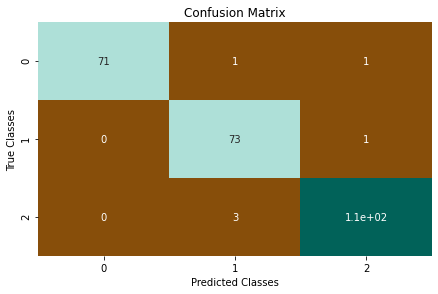

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable GUANTE como objetivo y guardando el modelo en el archivo: sgd-cv-big-guantes.g2.joblib 

SKIPPED training, Model LOADED from file sgd-cv-big-guantes.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=42,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.

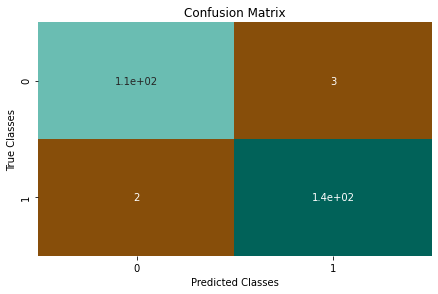

Curva ROC (clasificación binaria)
ROC SCORE 0.9801538006506951


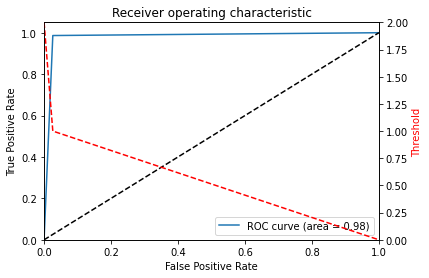

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable COLOR como objetivo y guardando el modelo en el archivo: sgd-cv-small-color.g2.joblib 

SKIPPED training, Model LOADED from file sgd-cv-small-color.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=42,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.

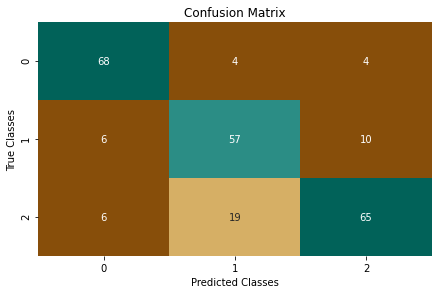

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable GUANTE como objetivo y guardando el modelo en el archivo: sgd-cv-small-guantes.g2.joblib 

SKIPPED training, Model LOADED from file sgd-cv-small-guantes.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=42,
                                     shuffle=True, tol=0.001,
                                     validation_fracti

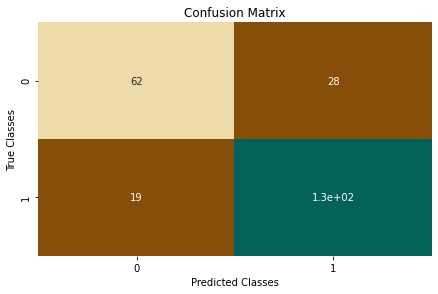

Curva ROC (clasificación binaria)
ROC SCORE 0.7806860551826994


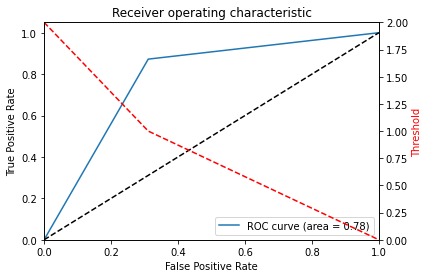

####################################################################################################


In [ ]:
(sgd_cv_big_1, sgd_cv_big_2, sgd_cv_small_1, sgd_cv_small_2) = run("sgd-cv", lambda: sgd_gs)

## DecisionTree

### DecisionTree Default

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable COLOR como objetivo y guardando el modelo en el archivo: dt-big-color.g2.joblib 

SKIPPED training, Model LOADED from file dt-big-color.g2.joblib
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00       172
           2       1.00      1.00      1.00       243

    accura

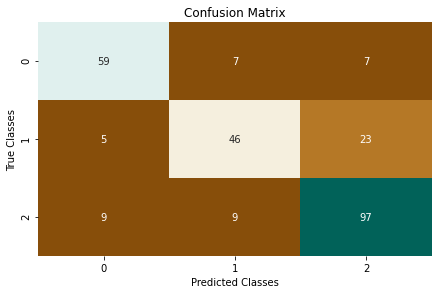

Gráfico del árbol de desición


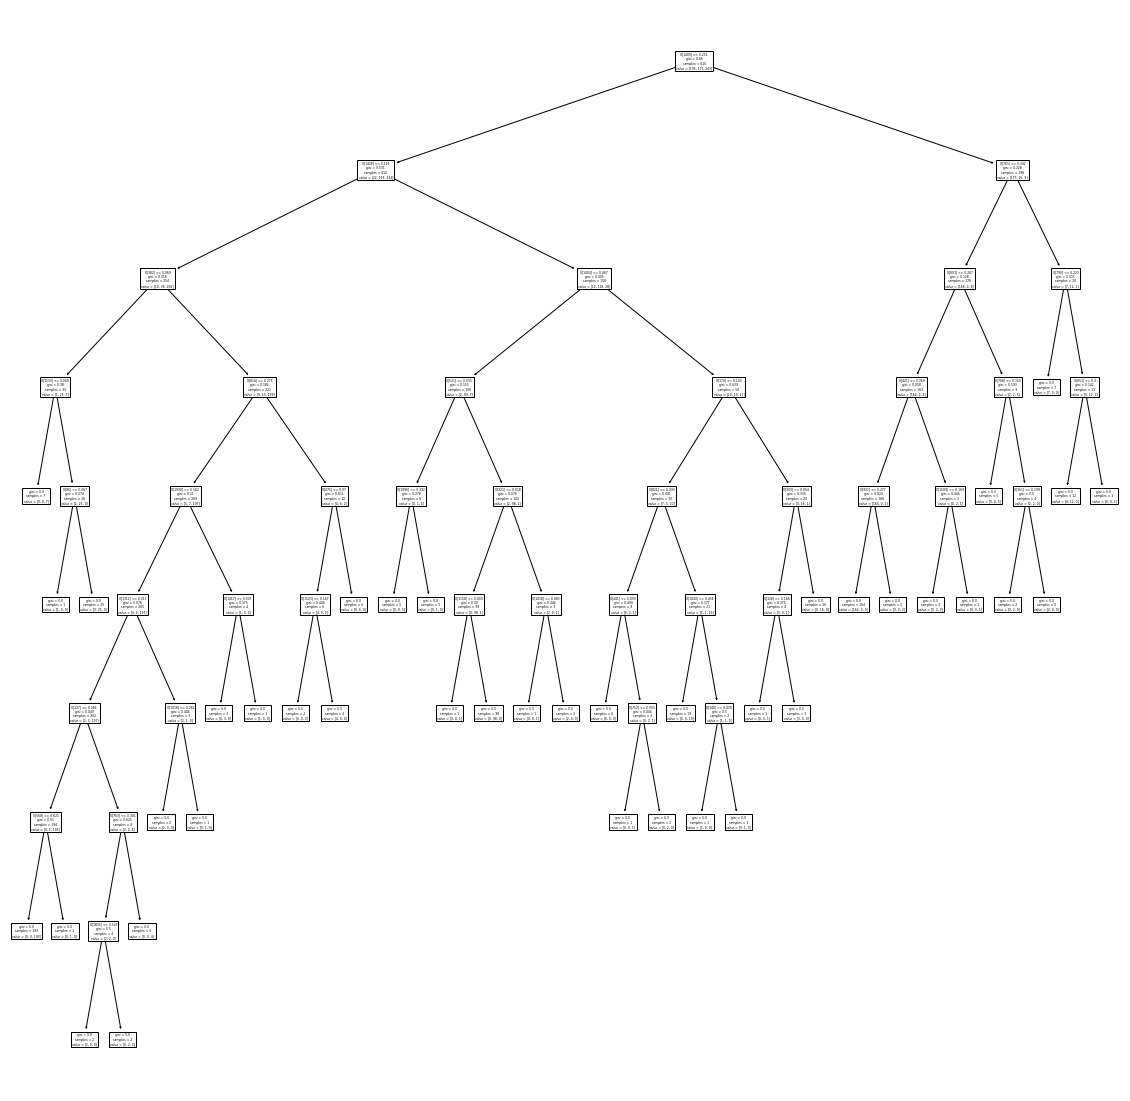

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable GUANTE como objetivo y guardando el modelo en el archivo: dt-big-guantes.g2.joblib 

SKIPPED training, Model LOADED from file dt-big-guantes.g2.joblib
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       367

    accuracy                           1.00       610
   ma

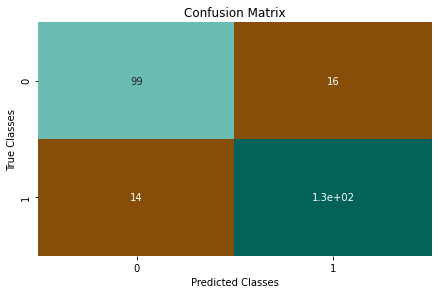

Curva ROC (clasificación binaria)
ROC SCORE 0.882815734989648


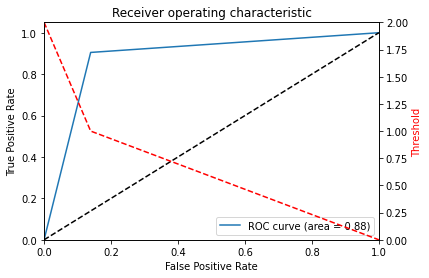

Gráfico del árbol de desición


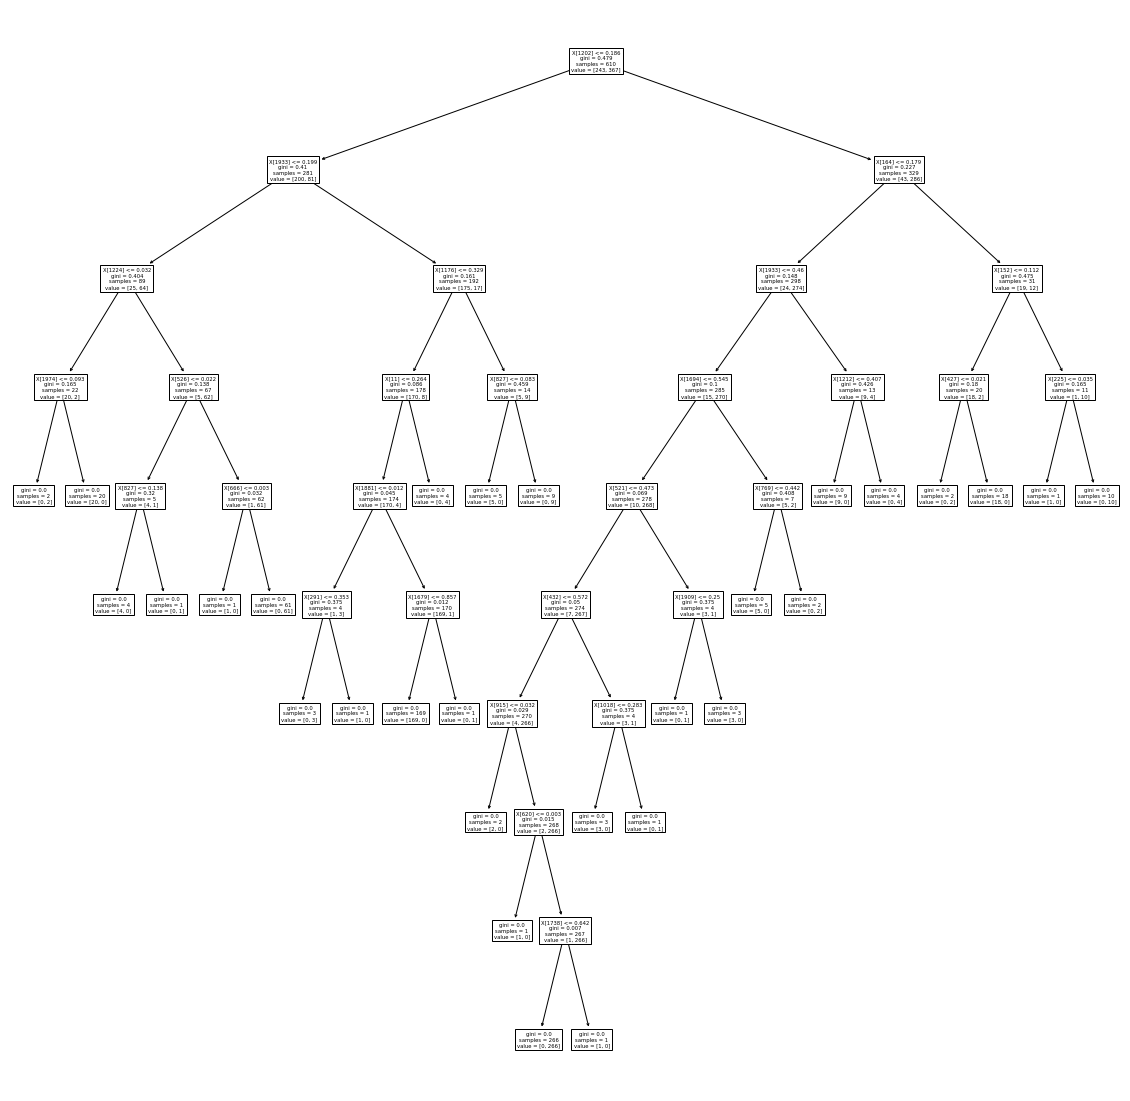

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable COLOR como objetivo y guardando el modelo en el archivo: dt-small-color.g2.joblib 

SKIPPED training, Model LOADED from file dt-small-color.g2.joblib
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       173
           2       1.00      1.00      1.00       214

    a

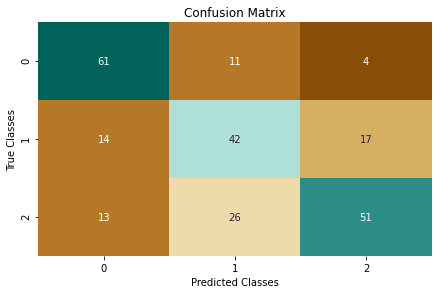

Gráfico del árbol de desición


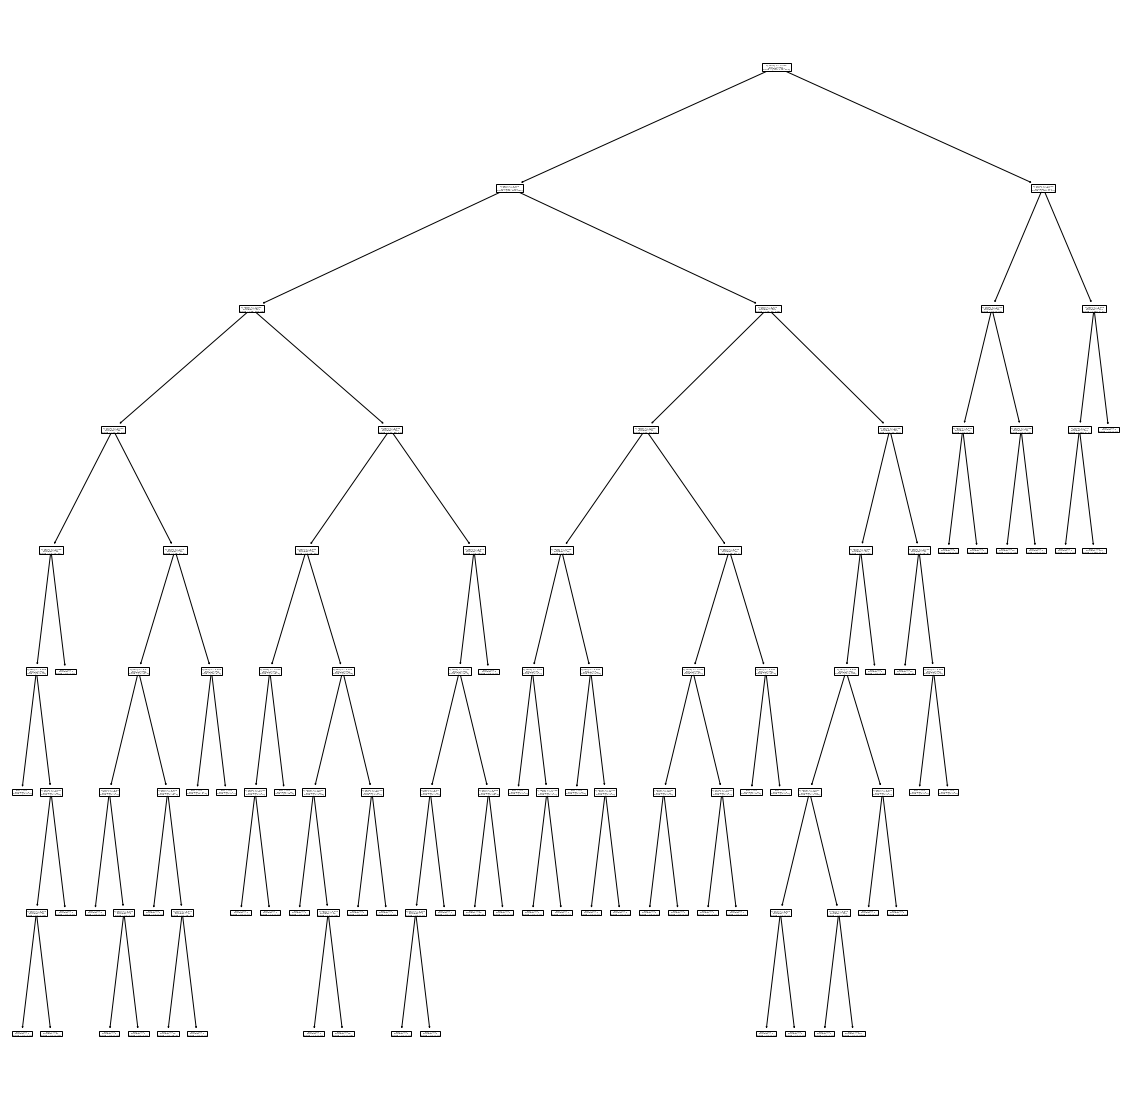

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable GUANTE como objetivo y guardando el modelo en el archivo: dt-small-guantes.g2.joblib 

SKIPPED training, Model LOADED from file dt-small-guantes.g2.joblib
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00       343

    accuracy                           1.00       557


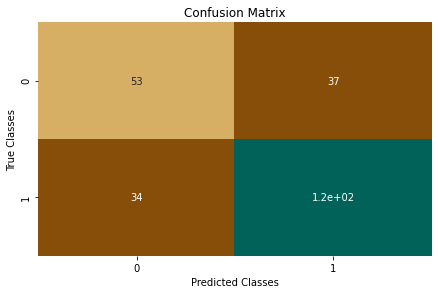

Curva ROC (clasificación binaria)
ROC SCORE 0.6803504847129008


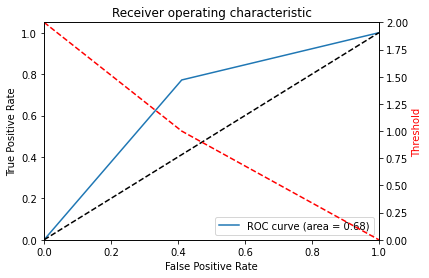

Gráfico del árbol de desición


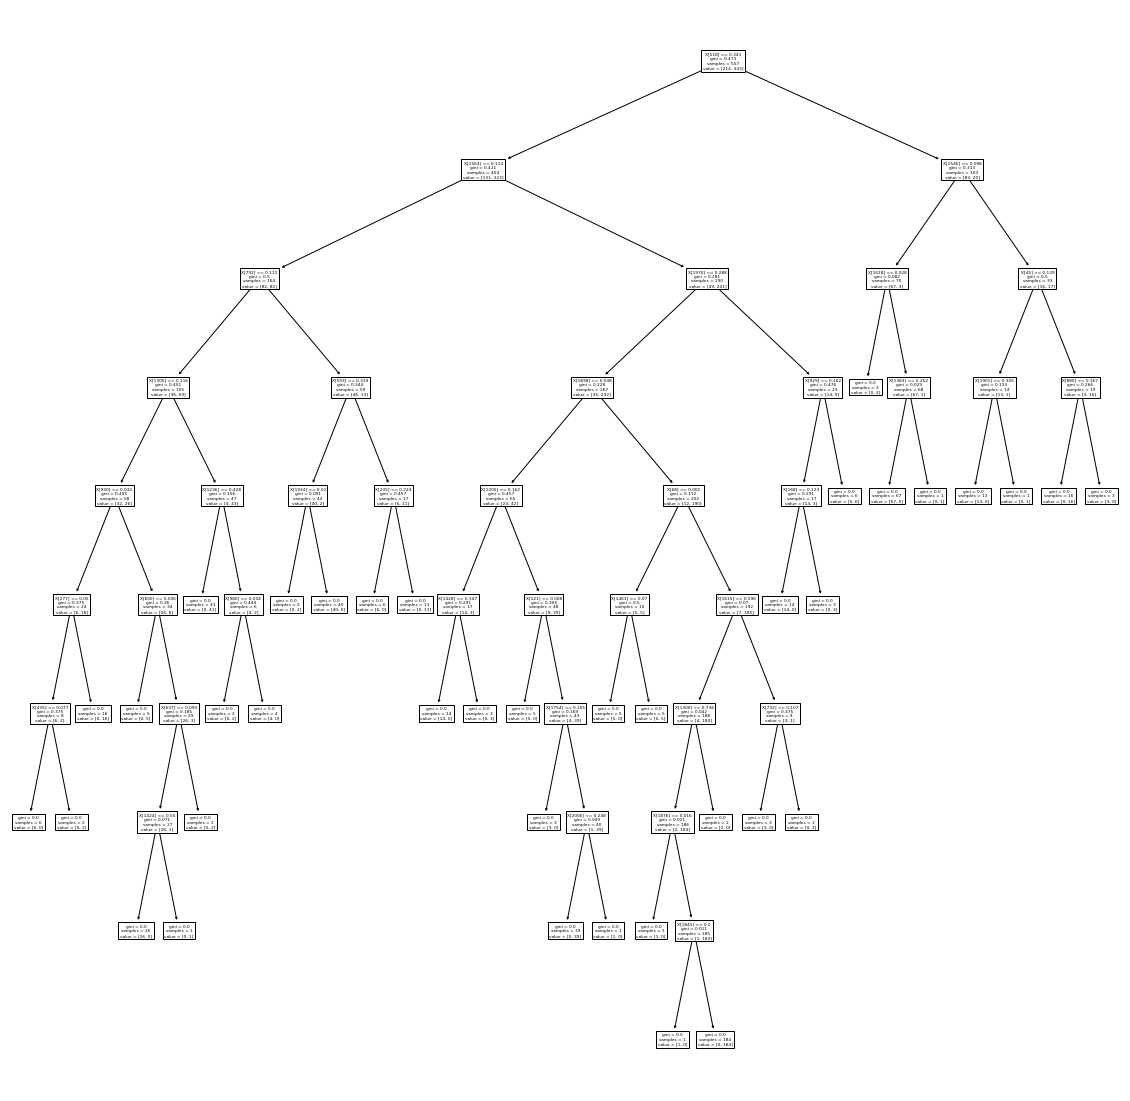

####################################################################################################


In [ ]:
(dt_big_1, dt_big_2, dt_small_1, dt_small_2) = run("dt", lambda: DecisionTreeClassifier(random_state=42))

### DecisionTree CV

In [ ]:
dt_grid = {
    'criterion': ['gini', 'entropy', ],
    'splitter': ['best', 'random',],
    'max_depth': [None,1,3,5,7,15,17],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
}
dt_gs = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_grid, verbose=1, cv=5, n_jobs=-1)

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable COLOR como objetivo y guardando el modelo en el archivo: dt-cv-big-color.g2.joblib 

SKIPPED training, Model LOADED from file dt-cv-big-color.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
 

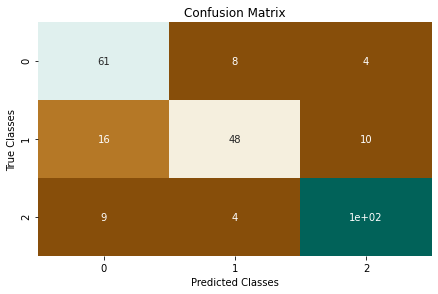

Gráfico del árbol de desición


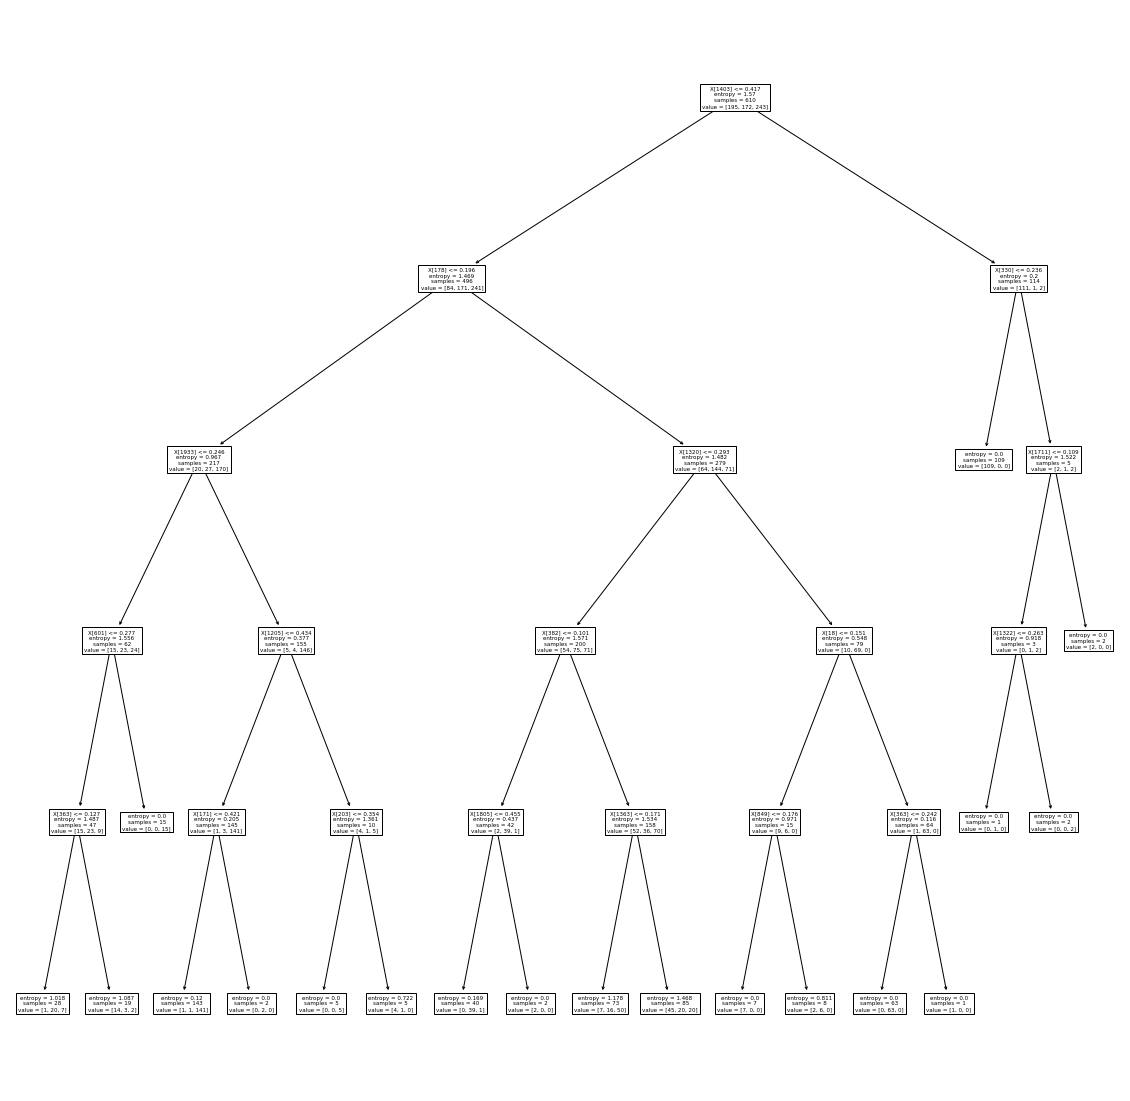

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable GUANTE como objetivo y guardando el modelo en el archivo: dt-cv-big-guantes.g2.joblib 

SKIPPED training, Model LOADED from file dt-cv-big-guantes.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0

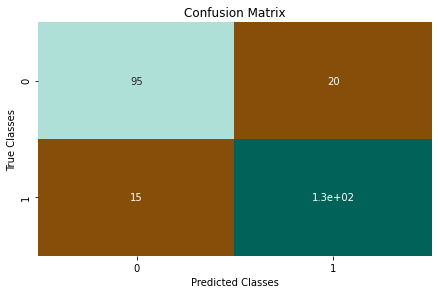

Curva ROC (clasificación binaria)
ROC SCORE 0.8620230700976043


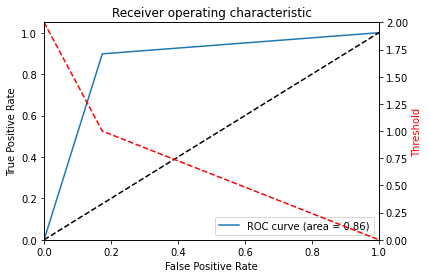

Gráfico del árbol de desición


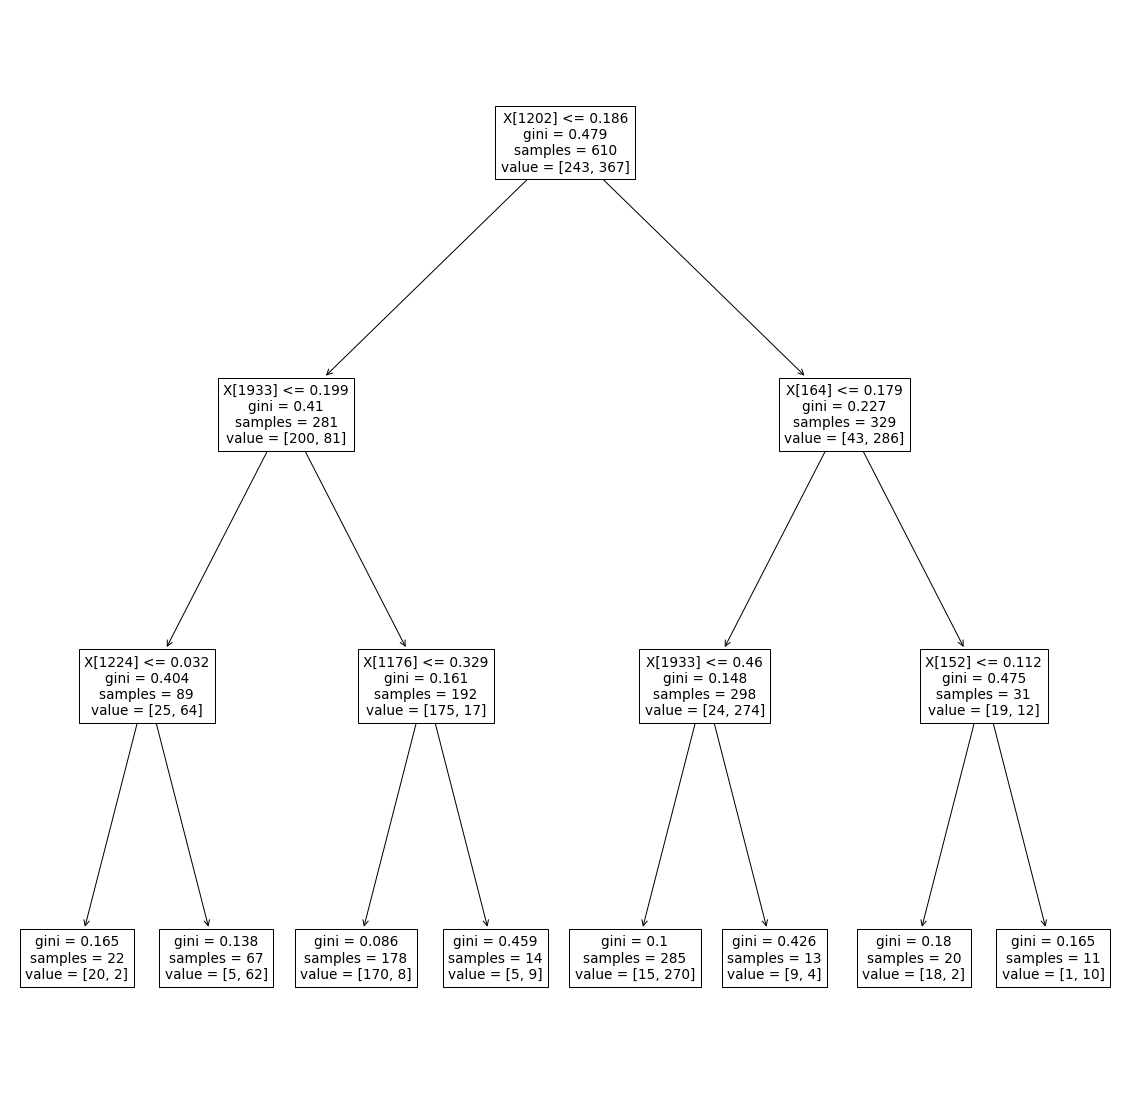

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable COLOR como objetivo y guardando el modelo en el archivo: dt-cv-small-color.g2.joblib 

SKIPPED training, Model LOADED from file dt-cv-small-color.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0

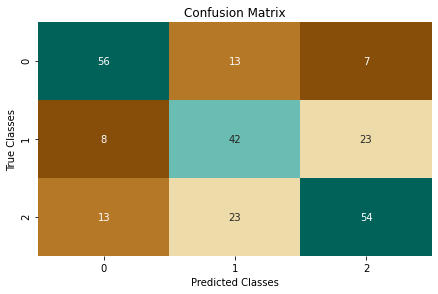

Gráfico del árbol de desición


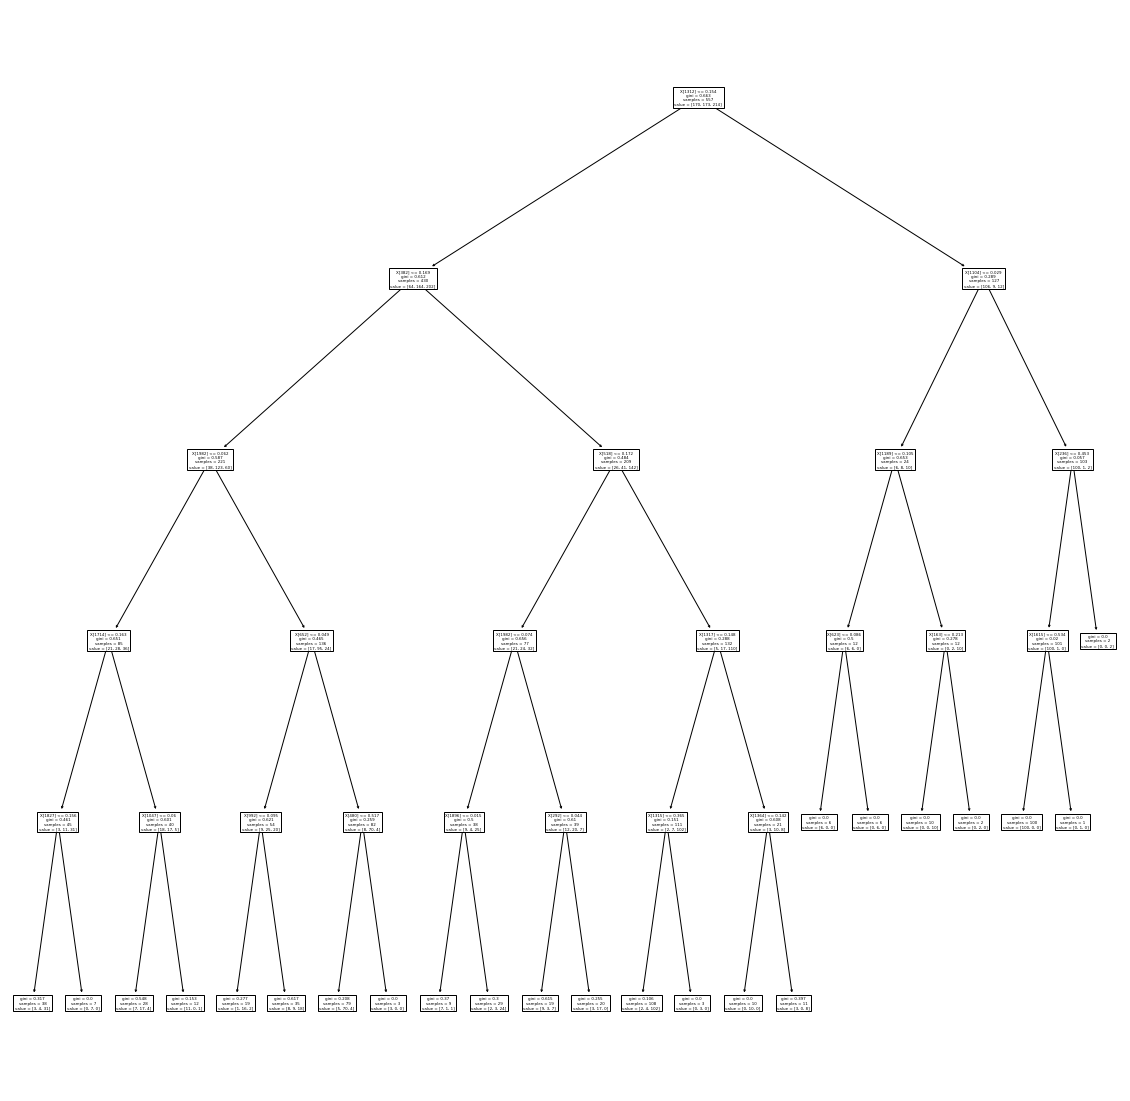

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable GUANTE como objetivo y guardando el modelo en el archivo: dt-cv-small-guantes.g2.joblib 

SKIPPED training, Model LOADED from file dt-cv-small-guantes.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_l

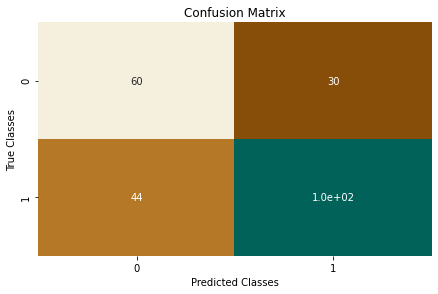

Curva ROC (clasificación binaria)
ROC SCORE 0.685682326621924


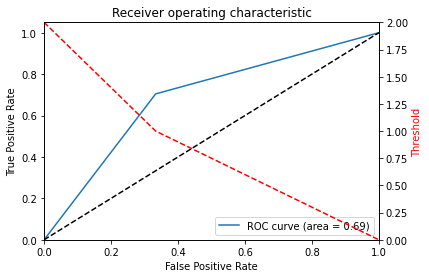

Gráfico del árbol de desición


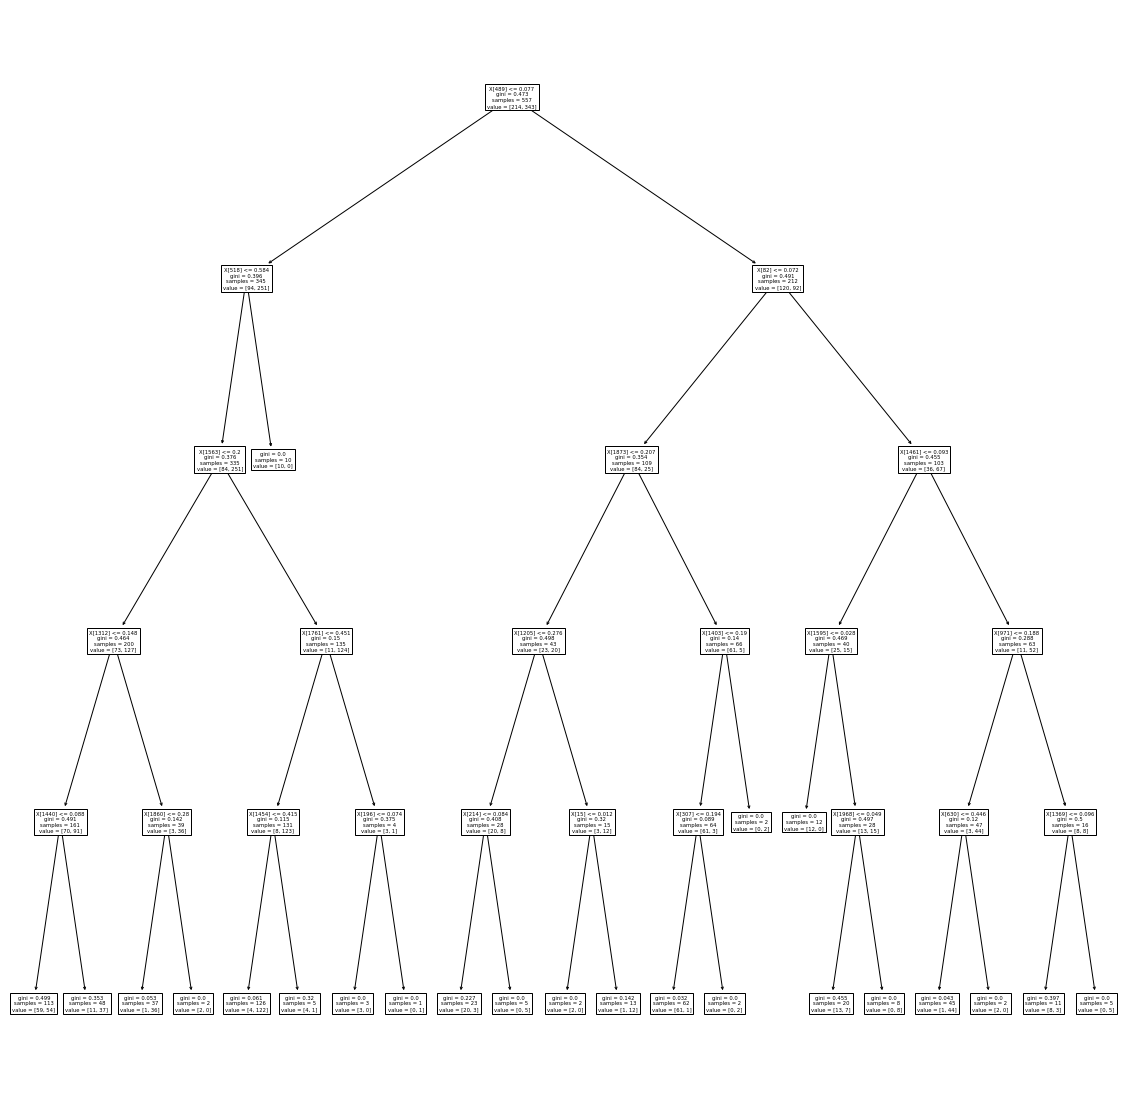

####################################################################################################


In [ ]:
(dt_cv_big_1, dt_cv_big_2, dt_cv_small_1, dt_cv_small_2) = run("dt-cv", lambda: dt_gs)

## KNN

### KNN Default

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable COLOR como objetivo y guardando el modelo en el archivo: knn-big-color.g2.joblib 

SKIPPED training, Model LOADED from file knn-big-color.g2.joblib
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       201
           1       0.94      0.94      0.94       172
           2       0.93      0.95      0.94       237

    accuracy                           0.94       610
   macro avg       0.94      0.94      0.94       610
weighted avg       0.94      0.94      0.94       610



Desempeño en el dataSet de TEST
              precision    recall  f1-score   sup

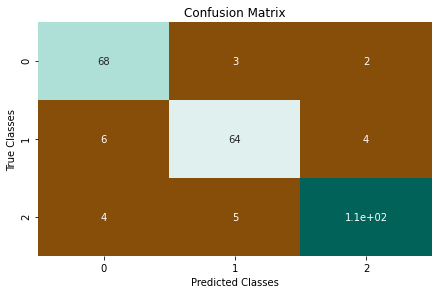

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable GUANTE como objetivo y guardando el modelo en el archivo: knn-big-guantes.g2.joblib 

SKIPPED training, Model LOADED from file knn-big-guantes.g2.joblib
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       237
           1       0.97      0.95      0.96       373

    accuracy                           0.95       610
   macro avg       0.95      0.95      0.95       610
weighted avg       0.95      0.95      0.95       610



Desempeño en el dataSet de TEST
              precision    recall  f1-score   support

           0       0.95      0.92      0.93

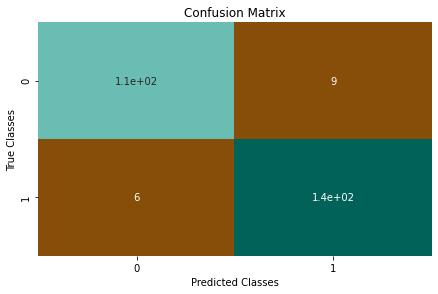

Curva ROC (clasificación binaria)
ROC SCORE 0.9404614019520852


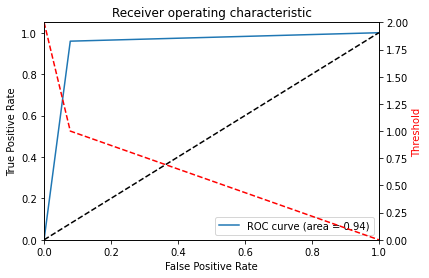

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable COLOR como objetivo y guardando el modelo en el archivo: knn-small-color.g2.joblib 

SKIPPED training, Model LOADED from file knn-small-color.g2.joblib
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       180
           1       0.78      0.77      0.77       176
           2       0.79      0.84      0.81       201

    accuracy                           0.80       557
   macro avg       0.80      0.80      0.80       557
weighted avg       0.80      0.80      0.80       557



Desempeño en el dataSet de TEST
              precision    recall  f1-score 

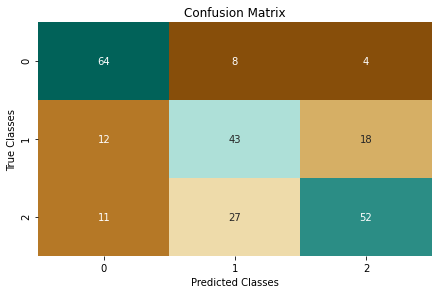

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable GUANTE como objetivo y guardando el modelo en el archivo: knn-small-guantes.g2.joblib 

SKIPPED training, Model LOADED from file knn-small-guantes.g2.joblib
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       201
           1       0.91      0.87      0.89       356

    accuracy                           0.86       557
   macro avg       0.85      0.86      0.85       557
weighted avg       0.86      0.86      0.86       557



Desempeño en el dataSet de TEST
              precision    recall  f1-score   support

           0       0.70      0.58     

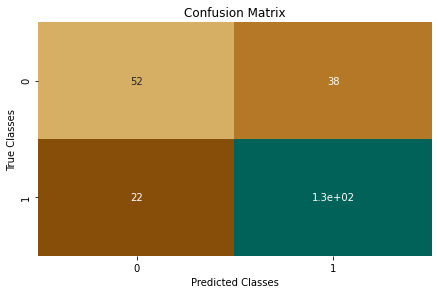

Curva ROC (clasificación binaria)
ROC SCORE 0.7150633855331842


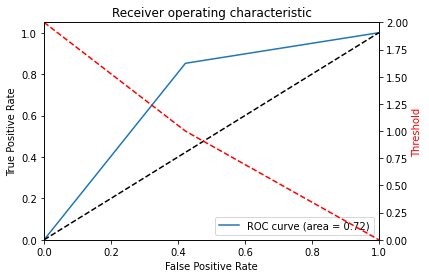

####################################################################################################


In [ ]:
(knn_big_1, knn_big_2, knn_small_1, knn_small_2) = run("knn", lambda: KNeighborsClassifier())


### KNN CV

In [ ]:
knn_grid = {
    "n_neighbors": [3, 5, 11, 19],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_grid, verbose=1, cv=5, n_jobs=-1)

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable COLOR como objetivo y guardando el modelo en el archivo: knn-cv-big-color.g2.joblib 

SKIPPED training, Model LOADED from file knn-cv-big-color.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_

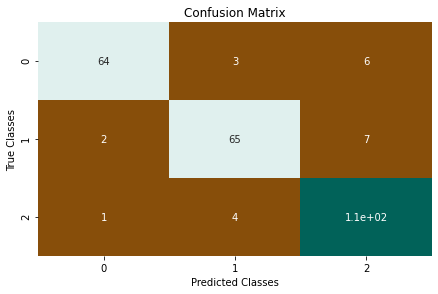

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable GUANTE como objetivo y guardando el modelo en el archivo: knn-cv-big-guantes.g2.joblib 

SKIPPED training, Model LOADED from file knn-cv-big-guantes.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_t

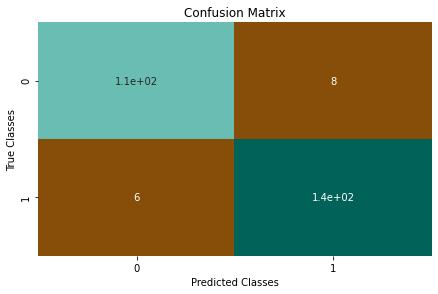

Curva ROC (clasificación binaria)
ROC SCORE 0.9448092280390417


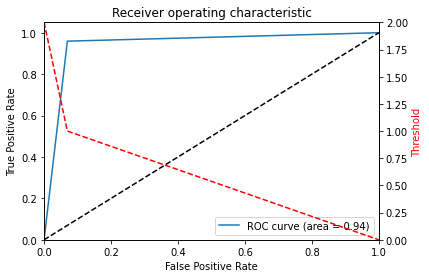

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable COLOR como objetivo y guardando el modelo en el archivo: knn-cv-small-color.g2.joblib 

SKIPPED training, Model LOADED from file knn-cv-small-color.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_t

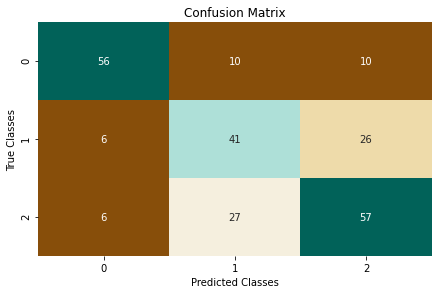

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable GUANTE como objetivo y guardando el modelo en el archivo: knn-cv-small-guantes.g2.joblib 

SKIPPED training, Model LOADED from file knn-cv-small-guantes.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, ret

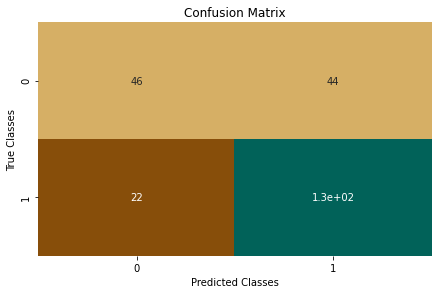

Curva ROC (clasificación binaria)
ROC SCORE 0.6817300521998508


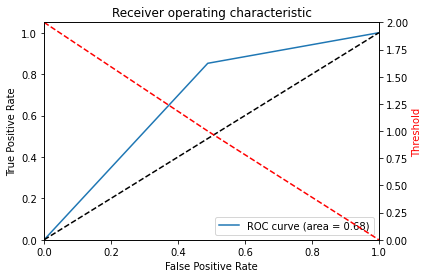

####################################################################################################


In [ ]:
(knn_cv_big_1, knn_cv_big_2, knn_cv_small_1, knn_cv_small_2) = run("knn-cv", lambda: knn_gs)

## SVC

### SVC Default

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable COLOR como objetivo y guardando el modelo en el archivo: svc-big-color.g2.joblib 

SKIPPED training, Model LOADED from file svc-big-color.g2.joblib
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       194
           1       1.00      0.99      1.00       173
           2       1.00      1.00      1.00       243

    accuracy                           1.00       610
   macro avg       1.00      1.00      1.00       610
weighted avg       1.00      1.00      1.00       610



Desempeño en el dataS

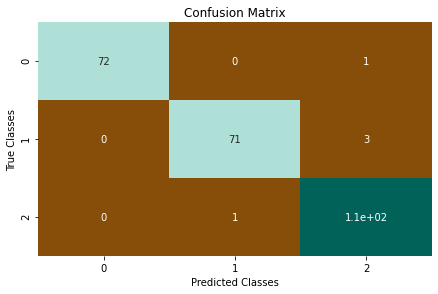

####################################################################################################

 Modelo entrenado para objetos de tamaño grande con la variable GUANTE como objetivo y guardando el modelo en el archivo: svc-big-guantes.g2.joblib 

SKIPPED training, Model LOADED from file svc-big-guantes.g2.joblib
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       239
           1       1.00      0.99      0.99       371

    accuracy                           0.99       610
   macro avg       0.99      0.99      0.99       610
weighted avg       0.99      0.99      0.99       610



Desempeño en el dataSet de TEST
              precision    recall  f1-

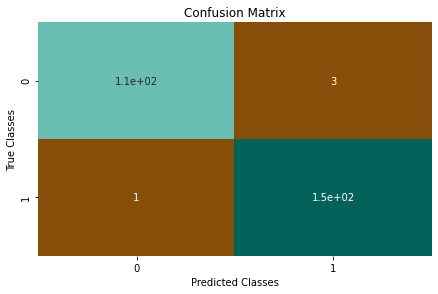

Curva ROC (clasificación binaria)
ROC SCORE 0.9835551611949128


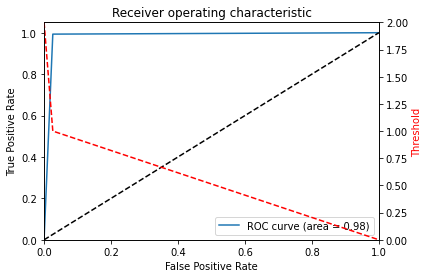

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable COLOR como objetivo y guardando el modelo en el archivo: svc-small-color.g2.joblib 

SKIPPED training, Model LOADED from file svc-small-color.g2.joblib
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       162
           1       0.92      0.94      0.93       169
           2       0.98      0.92      0.95       226

    accuracy                           0.94       557
   macro avg       0.94      0.95      0.94       557
weighted avg       0.95      0.94      0.94       557



Desempeño en el 

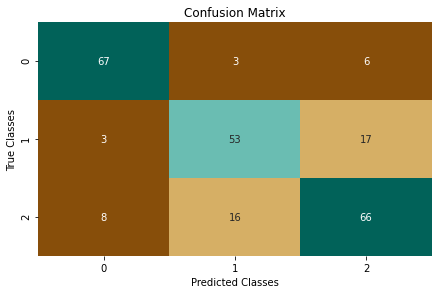

####################################################################################################

 Modelo entrenado para objetos de tamaño pequeño con la variable GUANTE como objetivo y guardando el modelo en el archivo: svc-small-guantes.g2.joblib 

SKIPPED training, Model LOADED from file svc-small-guantes.g2.joblib
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


Desempeño en el dataSet de TRAIN
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       202
           1       0.98      0.95      0.96       355

    accuracy                           0.95       557
   macro avg       0.95      0.96      0.95       557
weighted avg       0.95      0.95      0.95       557



Desempeño en el dataSet de TEST
              precision    recall

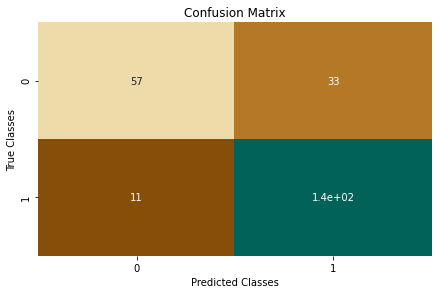

Curva ROC (clasificación binaria)
ROC SCORE 0.7797539149888142


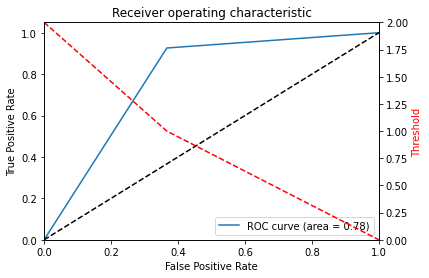

####################################################################################################


In [ ]:
(svc_big_1, svc_small_1, svc_big_1, svc_small_2) = run("svc", lambda: SVC(probability=True, random_state=42))

### SVC CV

In [ ]:
svc_grid = {
    "C": [0.1, 1, 10, 100, 1000],  
    "gamma": ["scale", "auto"],
    "kernel": ['rbf', 'poly']
}
svc_gs = GridSearchCV(SVC(probability=True, random_state=42), svc_grid, verbose=1, cv=5, n_jobs=-1)

####################################################################################################
Training model for BIG images and target COLOR and saving it to file svc-cv-big-color.g2.joblib
SKIPPED training, Model LOADED from file svc-cv-big-color.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None,

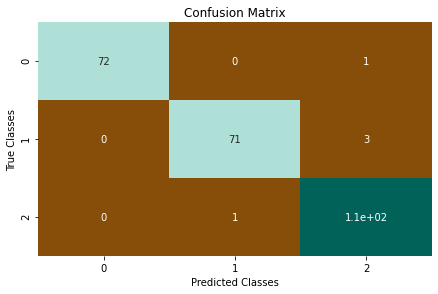

####################################################################################################
Training model for BIG images and target GUANTES and saving it to file svc-cv-big-guantes.g2.joblib
SKIPPED training, Model LOADED from file svc-cv-big-guantes.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

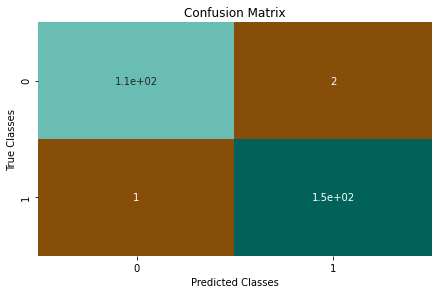

ROC curve (binary classification)
ROC SCORE 0.9879029872818693


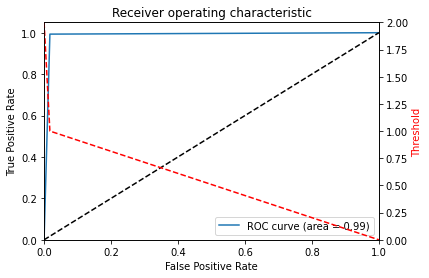

####################################################################################################
Training model for SMALL images and target COLOR and saving it to file svc-cv-small-color.g2.joblib
SKIPPED training, Model LOADED from file svc-cv-small-color.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

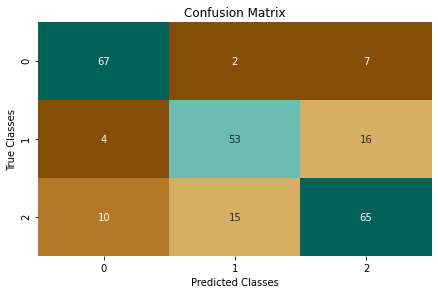

####################################################################################################
Training model for SMALL images and target GUANTES and saving it to file svc-cv-small-guantes.g2.joblib
SKIPPED training, Model LOADED from file svc-cv-small-guantes.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             s

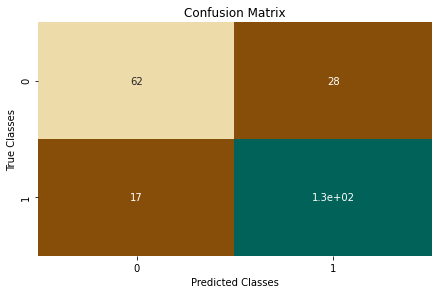

ROC curve (binary classification)
ROC SCORE 0.7873974645786727


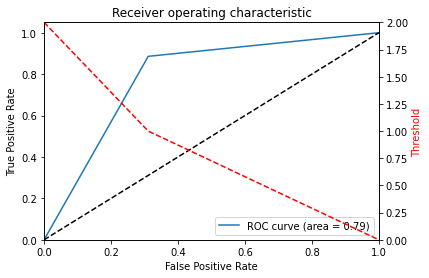

####################################################################################################


In [ ]:
(svc_cv_big_1, svc_cv_small_1, svc_cv_big_1, svc_cv_small_2) = run("svc-cv", lambda: svc_gs)

## RandomForest

### RandomForest Default

####################################################################################################
Training model for BIG images and target COLOR and saving it to file rfc-big-color.g2.joblib
SKIPPED training, Model LOADED from file rfc-big-color.g2.joblib
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


Performance in TRAIN dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00       172
  

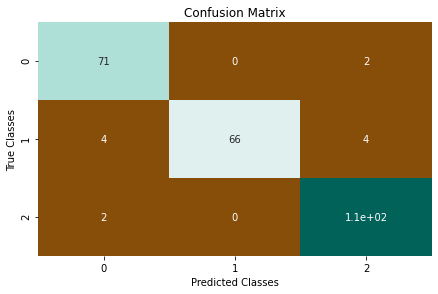

####################################################################################################
Training model for BIG images and target GUANTES and saving it to file rfc-big-guantes.g2.joblib
SKIPPED training, Model LOADED from file rfc-big-guantes.g2.joblib
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


Performance in TRAIN dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       

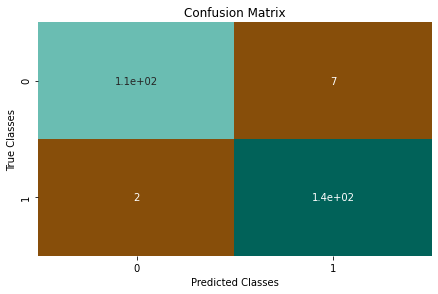

ROC curve (binary classification)
ROC SCORE 0.962762496302869


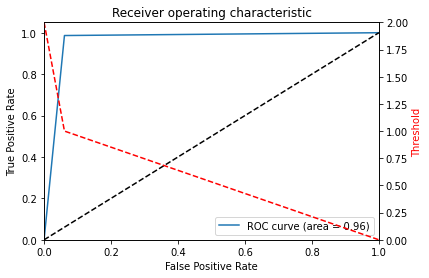

####################################################################################################
Training model for SMALL images and target COLOR and saving it to file rfc-small-color.g2.joblib
SKIPPED training, Model LOADED from file rfc-small-color.g2.joblib
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


Performance in TRAIN dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       

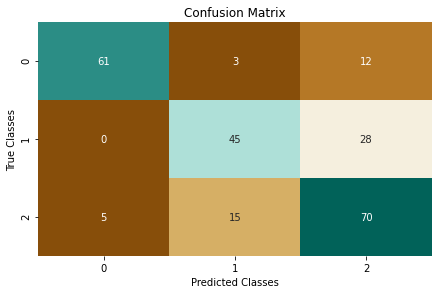

####################################################################################################
Training model for SMALL images and target GUANTES and saving it to file rfc-small-guantes.g2.joblib
SKIPPED training, Model LOADED from file rfc-small-guantes.g2.joblib
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


Performance in TRAIN dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00 

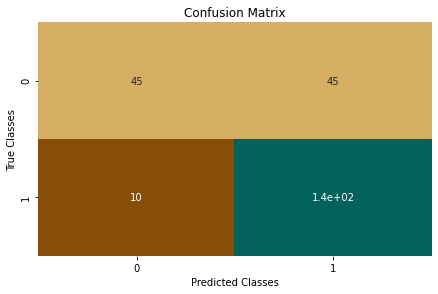

ROC curve (binary classification)
ROC SCORE 0.7164429530201342


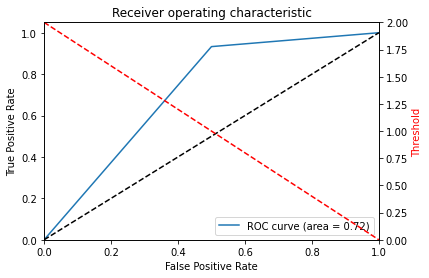

####################################################################################################


In [ ]:
(rfc_big_1, rfc_small_1, rfc_big_2, rfc_small_2) = run("rfc", lambda: RandomForestClassifier(random_state=42))

### RandomForest CV

In [ ]:
rfc_grid = {
    'max_depth': [None, 80, 100],
    'min_samples_leaf': [2, 5],
    'min_samples_split': [1, 10],
    'n_estimators': [100, 200, 300]
}
rfc_gs = GridSearchCV(RandomForestClassifier(random_state=42), rfc_grid, verbose=1, cv=5, n_jobs=-1)

####################################################################################################
Training model for BIG images and target COLOR and saving it to file rfc-cv-big-color.g2.joblib
SKIPPED training, Model LOADED from file rfc-cv-big-color.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
  

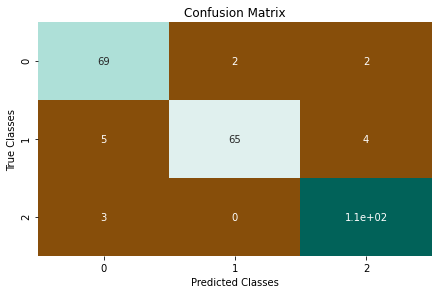

####################################################################################################
Training model for BIG images and target GUANTES and saving it to file rfc-cv-big-guantes.g2.joblib
SKIPPED training, Model LOADED from file rfc-cv-big-guantes.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split

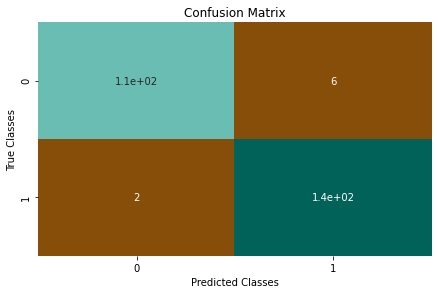

ROC curve (binary classification)
ROC SCORE 0.9671103223898254


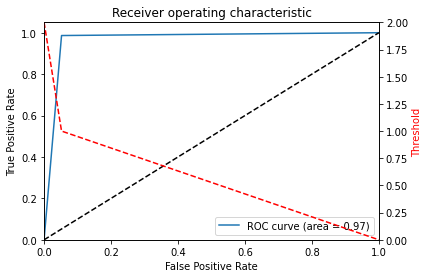

####################################################################################################
Training model for SMALL images and target COLOR and saving it to file rfc-cv-small-color.g2.joblib
SKIPPED training, Model LOADED from file rfc-cv-small-color.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split

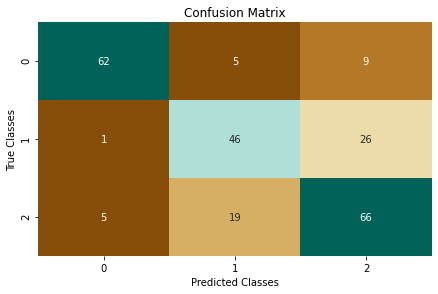

####################################################################################################
Training model for SMALL images and target GUANTES and saving it to file rfc-cv-small-guantes.g2.joblib
SKIPPED training, Model LOADED from file rfc-cv-small-guantes.g2.joblib
GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples

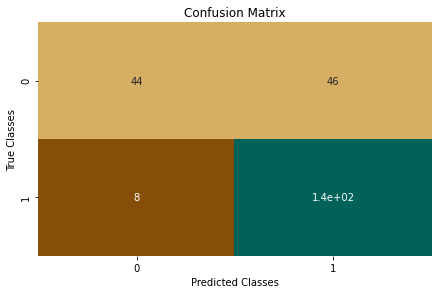

ROC curve (binary classification)
ROC SCORE 0.7175988068605519


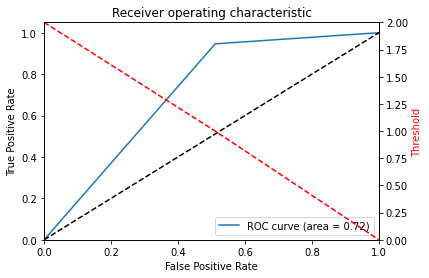

####################################################################################################


In [ ]:
(rfc_cv_big_1, rfc_cv_small_1, rfc_cv_big_2, rfc_cv_small_2) = run("rfc-cv", lambda: rfc_gs)

## GradientBoosting

### GradientBoosting Fixed Parameters

(CV is too slow)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = lambda: GradientBoostingClassifier(random_state=42, n_estimators=150, criterion="friedman_mse", max_depth=5)

####################################################################################################
Training model for BIG images and target COLOR and saving it to file gb-cv-big-color.g2.joblib
SKIPPED training, Model LOADED from file gb-cv-big-color.g2.joblib
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Performance in TRAIN dataset
           

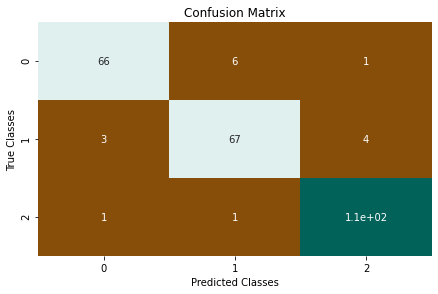

####################################################################################################
Training model for BIG images and target GUANTES and saving it to file gb-cv-big-guantes.g2.joblib
SKIPPED training, Model LOADED from file gb-cv-big-guantes.g2.joblib
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Performance in TRAIN dataset
     

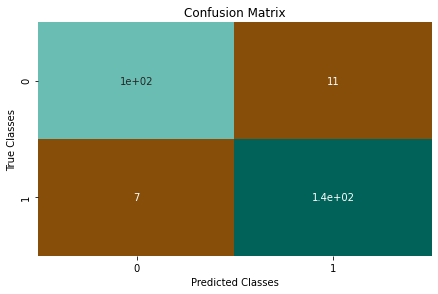

ROC curve (binary classification)
ROC SCORE 0.9283643892339545


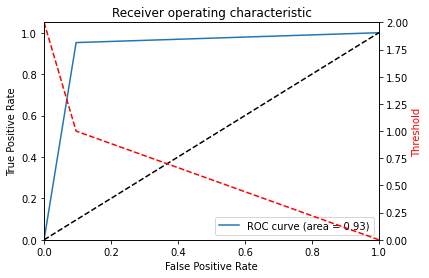

####################################################################################################
Training model for SMALL images and target COLOR and saving it to file gb-cv-small-color.g2.joblib
SKIPPED training, Model LOADED from file gb-cv-small-color.g2.joblib
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Performance in TRAIN dataset
     

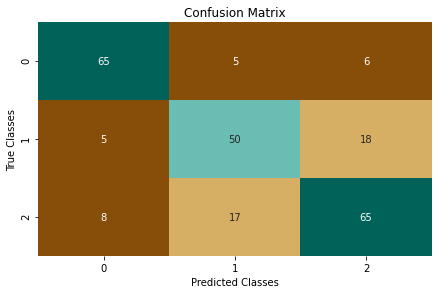

####################################################################################################
Training model for SMALL images and target GUANTES and saving it to file gb-cv-small-guantes.g2.joblib
SKIPPED training, Model LOADED from file gb-cv-small-guantes.g2.joblib
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Performance in TRAIN dataset

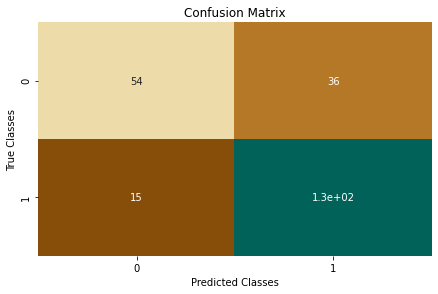

ROC curve (binary classification)
ROC SCORE 0.7496644295302013


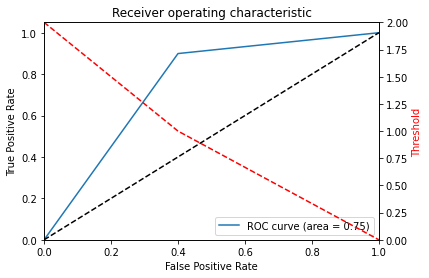

####################################################################################################


In [ ]:
(gb_big_1, gb_small_1, gb_big_2, gb_small_2) = run("gb-cv", gb)

## Comparación y elección del mejor modelo.

En una aplicación donde querramos que arroje una señal de alarma cuando el trabajador no está usando guantes, podemos hacer un detector de manos (sin guantes) y tomar esa situción como una detección positiva. Bajo esa situación la metrica mas adecuada seríía la "**precisión**". Un falso positivo implica que el trabajador tiene guantes y el sistema detecta que no los tiene, y eso priorí sería un sistema mas conservador.
Pero si quisieramos evaluar cuan riesgoso es el sistema en el sentido de que no detecta cuando una persona no tiene los guantes puestos, falsos negativos, seríía mas adecuado usar la métrica de "**recall**".

Ordenando los modelos por presición, agrupando por tamaño y target, obtenemos los siguientes resultados.

In [ ]:
models_big_cv_color = [filename for filename in models_info if "cv" in filename and "big" in filename and "color" in filename]
models_small_cv_color = [filename for filename in models_info if "cv" in filename and "small" in filename and "color" in filename]
models_big_cv_guantes = [filename for filename in models_info if "cv" in filename and "big" in filename and "guantes" in filename]
models_small_cv_guantes = [filename for filename in models_info if "cv" in filename and "small" in filename and "guantes" in filename]

In [ ]:
def sorted_models(model_list):
  models = []
  precisions = [models_info[filename]["report"]["macro avg"]["precision"] \
                for filename in model_list]
  data = {
      "model": model_list,
      "precision": precisions
  }
  comp_df = pd.DataFrame.from_dict(data)
  comp_df = comp_df.sort_values(by=["precision"], ascending=False)
  comp_df = comp_df.reset_index(drop=True)  
  comp_df = comp_df.style.apply(custom_style, subset=pd.IndexSlice[0:0, ['model', 'precision']])
  return comp_df

def custom_style(row):
  color = 'yellow'
  return ['background-color: %s' % color]*len(row.values)

#### Mejor modelo para objetos grandes vs color

In [ ]:
sorted_models(models_big_cv_color)

,model,precision
0,svc-cv-big-color.g2.joblib,0.984071
1,sgd-cv-big-color.g2.joblib,0.976836
2,perceptron-cv-big-color.g2.joblib,0.970112
3,rfc-cv-big-color.g2.joblib,0.938469
4,gb-cv-big-color.g2.joblib,0.935297
5,knn-cv-big-color.g2.joblib,0.917437
6,dt-cv-big-color.g2.joblib,0.796204


#### Mejor modelo para objetos pequeños vs color

In [ ]:
sorted_models(models_small_cv_color)

,model,precision
0,perceptron-cv-small-color.g2.joblib,0.802146
1,sgd-cv-small-color.g2.joblib,0.795095
2,svc-cv-small-color.g2.joblib,0.774313
3,gb-cv-small-color.g2.joblib,0.752705
4,rfc-cv-small-color.g2.joblib,0.740791
5,knn-cv-small-color.g2.joblib,0.654025
6,dt-cv-small-color.g2.joblib,0.636197


#### Mejor modelo para objetos grandes vs guantes

In [ ]:
sorted_models(models_big_cv_guantes)

,model,precision
0,svc-cv-big-guantes.g2.joblib,0.988857
1,sgd-cv-big-guantes.g2.joblib,0.981093
2,perceptron-cv-big-guantes.g2.joblib,0.971869
3,rfc-cv-big-guantes.g2.joblib,0.971123
4,knn-cv-big-guantes.g2.joblib,0.946606
5,gb-cv-big-guantes.g2.joblib,0.932045
6,dt-cv-big-guantes.g2.joblib,0.866029


#### Mejor modelo para objetos pequeños vs guantes

In [ ]:
sorted_models(models_small_cv_guantes)

,model,precision
0,perceptron-cv-small-guantes.g2.joblib,0.805290
1,svc-cv-small-guantes.g2.joblib,0.804905
2,rfc-cv-small-guantes.g2.joblib,0.800082
3,sgd-cv-small-guantes.g2.joblib,0.794108
4,gb-cv-small-guantes.g2.joblib,0.785422
5,knn-cv-small-guantes.g2.joblib,0.709580
6,dt-cv-small-guantes.g2.joblib,0.677350


#### Conclusión:
Se puede concluir que el mejor modelo es el que se obtiene a partir de los algoritmos basados en **Support Vector Machine** superior al 98% para objetos grandes y 80% para los objetos pequeños. 
Esta conclusióón es fuertemente soportada si uno analiza las curvas ROC obtenidas para estos modelos. En estos gráficos se observa que para objetos grandes se obtiene una AOC cercano al 99% y de 80% para objetos pequeños. 
Por otro lado, analizando las matrices de confusión, se observa que para objetos grandes los errores de clasificación son muy bajos, inclusive para guantes amarillos vs manos, que en principio podrían confundirse. Para objetos pequeños el error de clasificación aumenta. 

A partir de estos resultados tambiéén podemos ver que a la precisióón de los algoritmos para la clasificación de objetos pequeños (small) es al menos un 20% peor que para los objetos grandes (big). Lo que hace pensar es que para una buena clasificación es necesario contar imágenes de buena resolución. 

## Extra: Voting classifier


Para imágenes pequeñas que poseen los peores scores intentaremos construir un modelo mejor a los obtenidos anteriormente.  
Para ello intentaremos mejorar la performance observada en la lista de "Pequeños vs Guantes" mediante la combinación de modelos. Para esta construcción haremos un ensable entre el 2° y 3° modelo para mejorar la performance del 1°.

In [ ]:
voting = lambda: VotingClassifier(estimators=[('svc', svc_cv_small_2), ('rfc', rfc_cv_small_2)], voting='soft', weights=[1, 1])

SKIPPED training, Model LOADED from file voting-target2-small
VotingClassifier(estimators=[('svc',
                              GridSearchCV(cv=5, error_score=nan,
                                           estimator=SVC(C=1.0,
                                                         break_ties=False,
                                                         cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3,
                                                         gamma='scale',
                                                         kernel='rbf',
                                                         max_iter=-1,
                                                         probability=True,
                                    

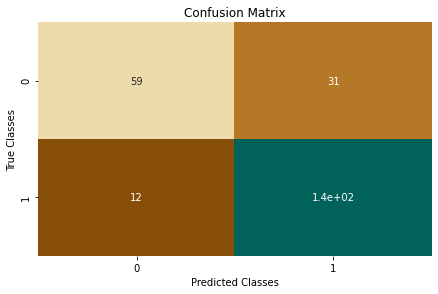

Curva ROC (clasificación binaria)
ROC SCORE 0.7875093214019389


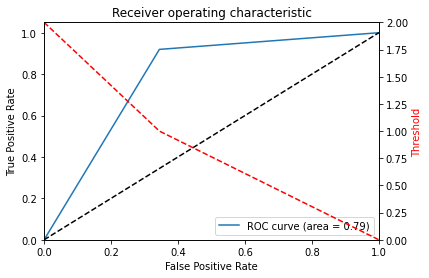

In [ ]:
voting_small = create_and_fit("voting-target2-small", voting, X_small_train, y_small_target2_train, X_small_test, y_small_target2_test)

In [ ]:
models_small_cv_guantes_2 = models_small_cv_guantes + ["voting-target2-small"]

In [ ]:
sorted_models(models_small_cv_guantes_2)

,model,precision
0,voting-target2-small,0.823231
1,perceptron-cv-small-guantes.g2.joblib,0.805290
2,svc-cv-small-guantes.g2.joblib,0.804905
3,rfc-cv-small-guantes.g2.joblib,0.800082
4,sgd-cv-small-guantes.g2.joblib,0.794108
5,gb-cv-small-guantes.g2.joblib,0.785422
6,knn-cv-small-guantes.g2.joblib,0.709580
7,dt-cv-small-guantes.g2.joblib,0.677350


Aplicando este ensamble se obtuvo una mejora de un 3% aproximadamente con relacióón al modelo perceptron.

In [ ]:
voting_small.estimators_

[GridSearchCV(cv=5, error_score=nan,
              estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                            class_weight=None, coef0=0.0,
                            decision_function_shape='ovr', degree=3,
                            gamma='scale', kernel='rbf', max_iter=-1,
                            probability=True, random_state=42, shrinking=True,
                            tol=0.001, verbose=False),
              iid='deprecated', n_jobs=-1,
              param_grid={'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['rbf', 'poly']},
              pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
              scoring=None, verbose=1), GridSearchCV(cv=5, error_score=nan,
              estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                               class_weight=None,
                                               criterion='g